In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
import os
import csv

from matplotlib import rc

rc('text', usetex=False)
rc('font', family='serif', size=20)
rc('figure', figsize=(12,8))
rc('axes',linewidth=2)

# Funzioni utili

Funzioni per le routine del fit.  **Vanno compilate.**

Alla fine quella che uso è cauchy_asim (una cauchy asimmetrica) e fit_func (che è cauchy_asim su un bkg polinomiale di grado 1)

In [6]:
def cauchy(x,gamma,center):
    return (1./np.pi)*gamma/((x-center)**2+gamma**2)

def cauchy_asim(x,gamma,center,asim): #the gamma are HWHM
    gamma = gamma*2
    gamma_l = asim*gamma/(asim + 1.)
    gamma_r = gamma/(asim + 1.)
    if isinstance(x,float):
        if x < center:
            y = (gamma_l**2 )/ ((x - center)**2 + gamma_l**2) 

            if x >= center:
                y = (gamma_r**2 )/ ((x - center)**2 + gamma_r**2) 
    else:
        pos_vec = np.where(x >= center)[0]
        pos = int(pos_vec[0]) 
        SS = x[0:pos]
        DD = x[pos:int(len(x))]
        
        numerator1 = gamma_l**2
        denominator1 = (SS - center)**2 + gamma_l**2
        y1 = numerator1/denominator1
        
        numerator2 = gamma_r**2
        denominator2 = (DD - center)**2 + gamma_r**2
        y2 = numerator2/denominator2
        
        y = np.append(y1,y2)
        norm1 = 1./(np.pi*gamma_l*2)
        norm2 = 1./(np.pi*gamma_r*2)
        y = y *(norm1 + norm2)

    return y

def fit_func(x,norm,gamma,center,m,offset,asim):
    #out = offset+x*m-norm*cauchy(x,gamma,center)
    out = offset+x*m-norm*cauchy_asim(x,gamma,center,asim)
    return out

def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Salvo il .csv riassuntivo

Opening  Zoomed_peak24_23:03:03:21:31:42.dat ...


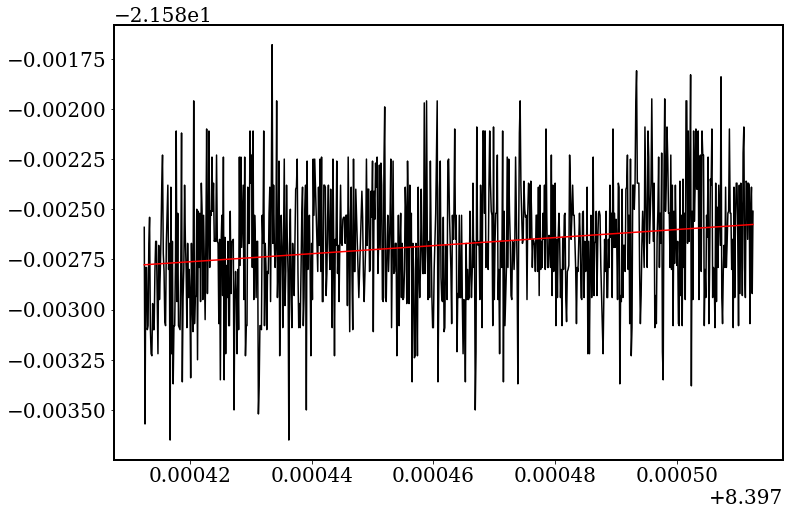

Q_factor =  4.38e+03 +/- 2874004.1787934992 	 |	 center = 8.397412620339674
RMSE =  0.0003110043440250736
#===================================
Opening  Zoomed_peak19_23:03:03:21:08:50.dat ...


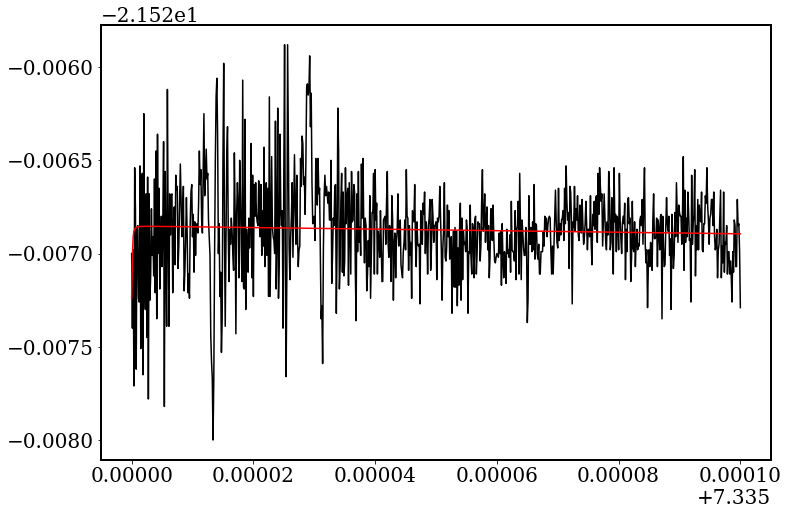

Q_factor =  5.28e+07 +/- 9.640612032962911 	 |	 center = 7.335000001688551
RMSE =  0.0002525704854933099
#===================================
Opening  Zoomed_peak18_23:03:03:21:07:24.dat ...


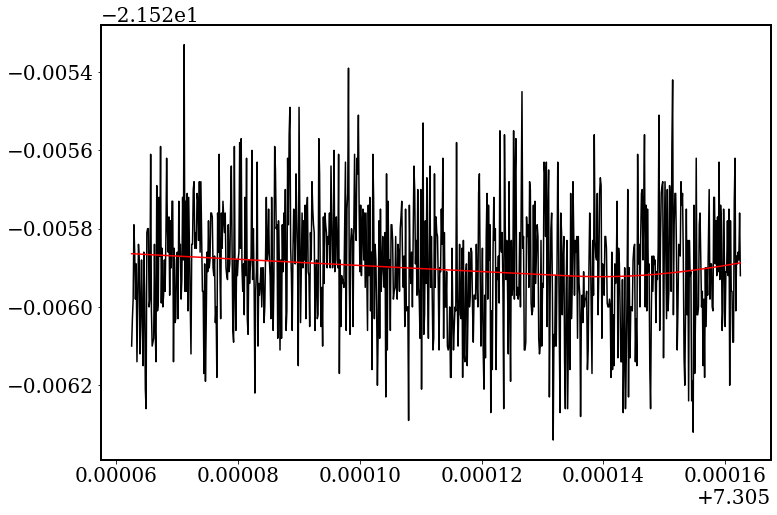

Q_factor =  6.65e+03 +/- 0.04460070496136649 	 |	 center = 7.305134768470779
RMSE =  0.00015837456364025749
#===================================
Opening  Zoomed_peak27_23:03:03:21:37:55.dat ...


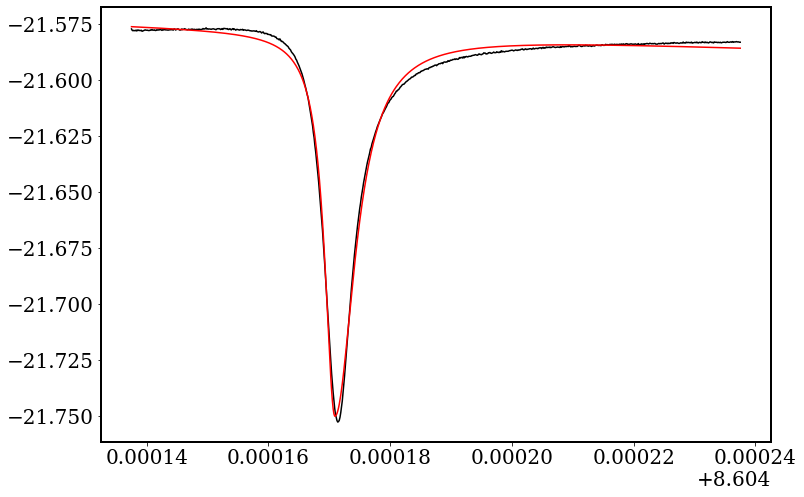

Q_factor =  1.43e+06 +/- 0.003024647834132067 	 |	 center = 8.604170907768598
RMSE =  0.002520028077331318
#===================================
Opening  Zoomed_peak53_23:03:03:22:15:07.dat ...


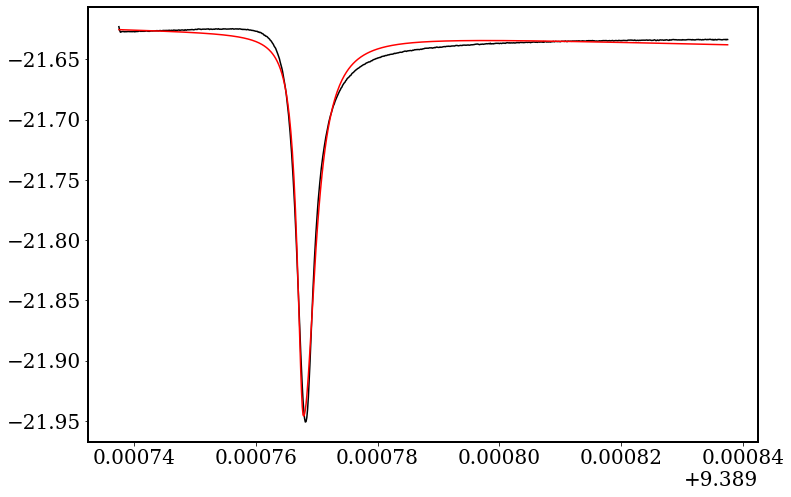

Q_factor =  2.65e+06 +/- 0.004160715781896846 	 |	 center = 9.389767821697694
RMSE =  0.005014992662227064
#===================================
Opening  Zoomed_peak16_23:03:03:20:59:01.dat ...


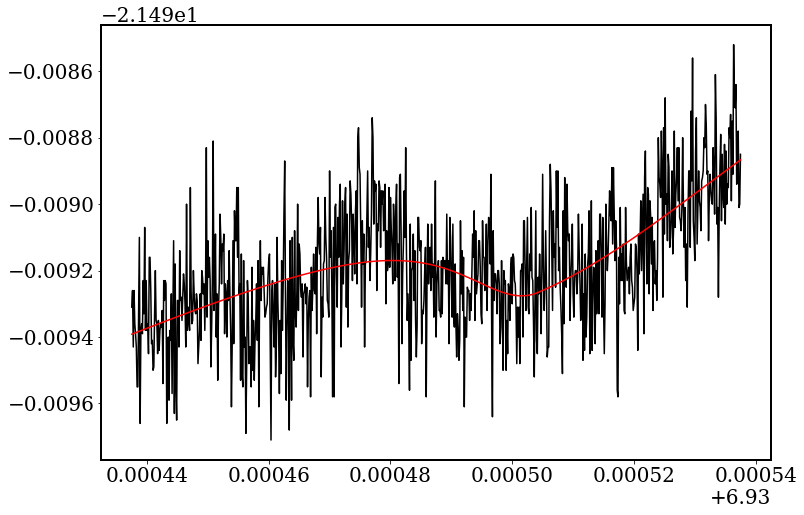

Q_factor =  1.06e+05 +/- 0.04816928150115256 	 |	 center = 6.930504315558753
RMSE =  0.00015709026174136304
#===================================
Opening  Zoomed_peak52_23:03:03:22:13:51.dat ...


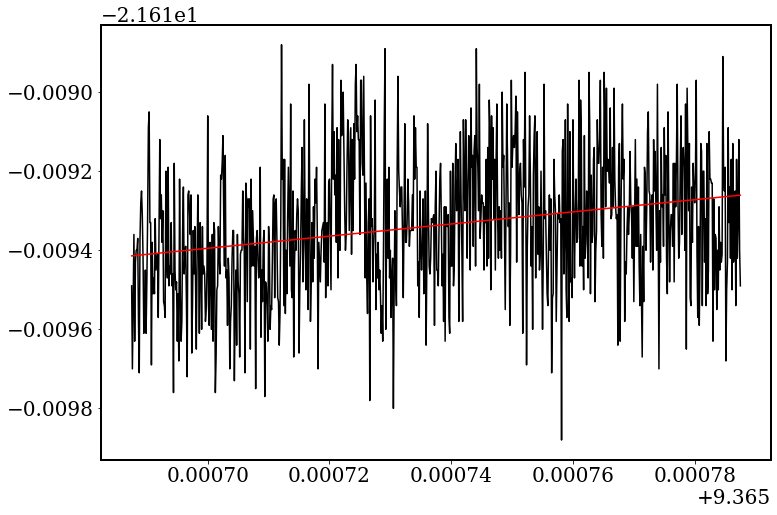

Q_factor =  4.68e+03 +/- 90437.15951016218 	 |	 center = 9.365787499999998
RMSE =  0.0001701164430382157
#===================================
Opening  Zoomed_peak61_23:03:03:22:26:01.dat ...


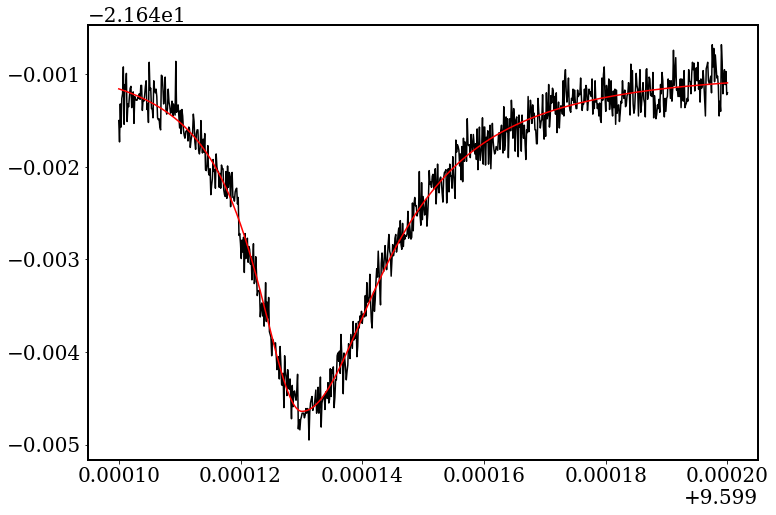

Q_factor =  3.70e+05 +/- 0.005274015619552987 	 |	 center = 9.59913007489636
RMSE =  0.00016107170000618127
#===================================
Opening  Zoomed_peak45_23:03:03:21:59:12.dat ...


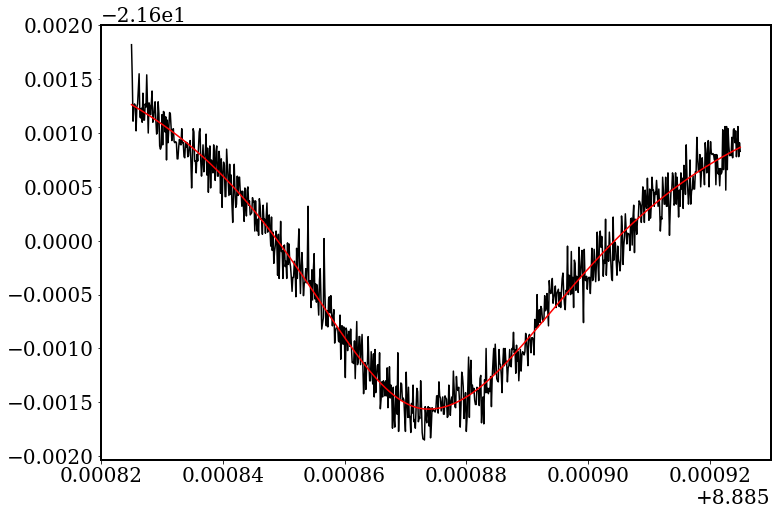

Q_factor =  1.37e+05 +/- 0.0045624970742336665 	 |	 center = 8.885873402766816
RMSE =  0.00015447472522661985
#===================================
Opening  Zoomed_peak28_23:03:03:21:39:10.dat ...


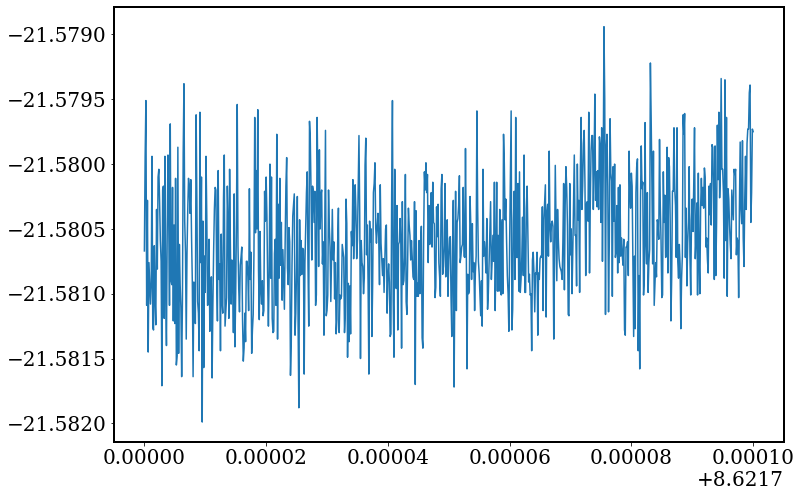

There was a problem during the fit!
#===================================
Opening  Zoomed_peak79_23:03:03:23:25:52.dat ...


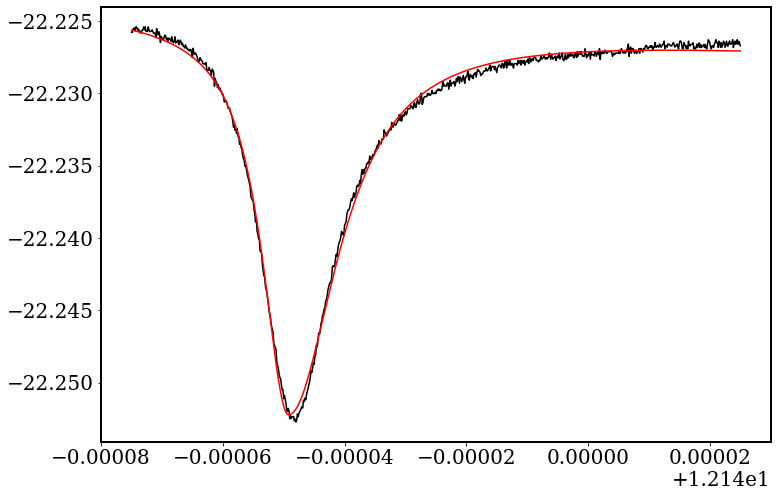

Q_factor =  8.02e+05 +/- 0.0020388027458013366 	 |	 center = 12.139950786095381
RMSE =  0.0003885146792033331
#===================================
Opening  Zoomed_peak33_23:03:03:21:45:36.dat ...


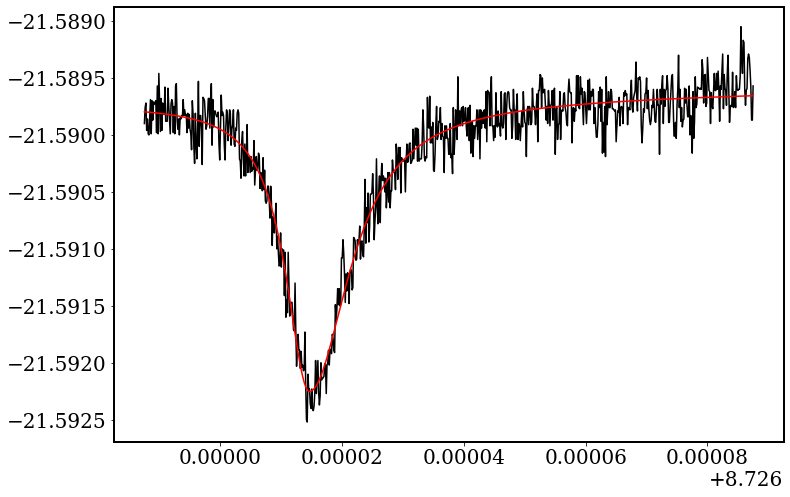

Q_factor =  6.87e+05 +/- 0.010097223153460143 	 |	 center = 8.726014608664071
RMSE =  0.000166975731466394
#===================================
Opening  Zoomed_peak89_23:03:03:23:55:32.dat ...


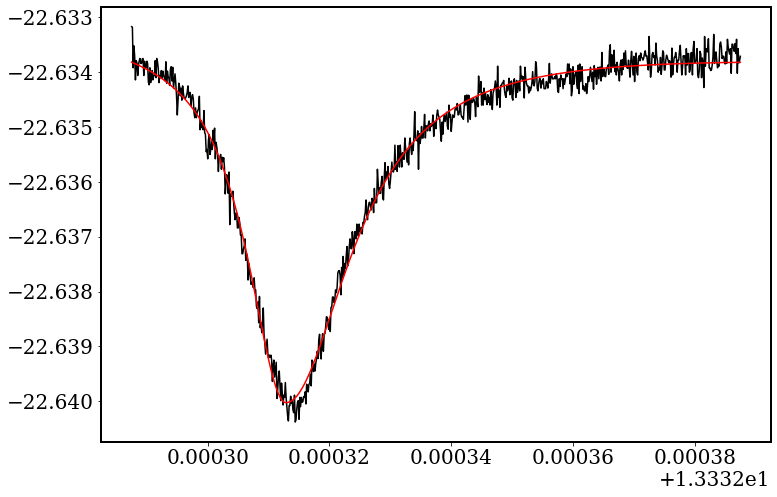

Q_factor =  6.40e+05 +/- 0.003745169244644366 	 |	 center = 13.332312825100141
RMSE =  0.00019152122279797218
#===================================
Opening  Zoomed_peak85_23:03:03:23:49:48.dat ...


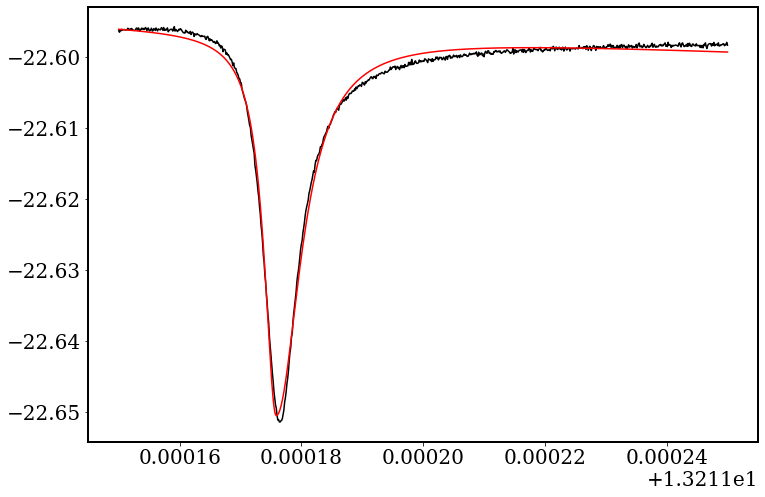

Q_factor =  1.82e+06 +/- 0.0030410606615367992 	 |	 center = 13.211175864704963
RMSE =  0.0008835561457479753
#===================================
Opening  Zoomed_peak22_23:03:03:21:20:13.dat ...


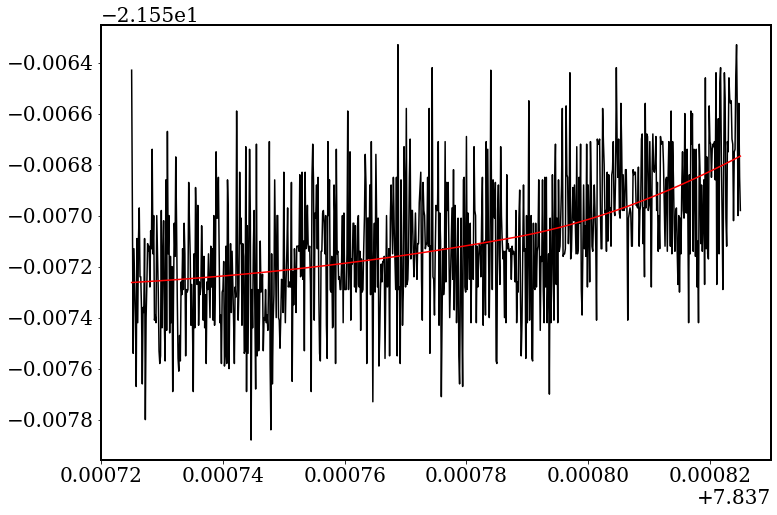

Q_factor =  1.37e+04 +/- 0.09360324753974991 	 |	 center = 7.837787553022049
RMSE =  0.00023547908808923664
#===================================
Opening  Zoomed_peak17_23:03:03:21:05:37.dat ...


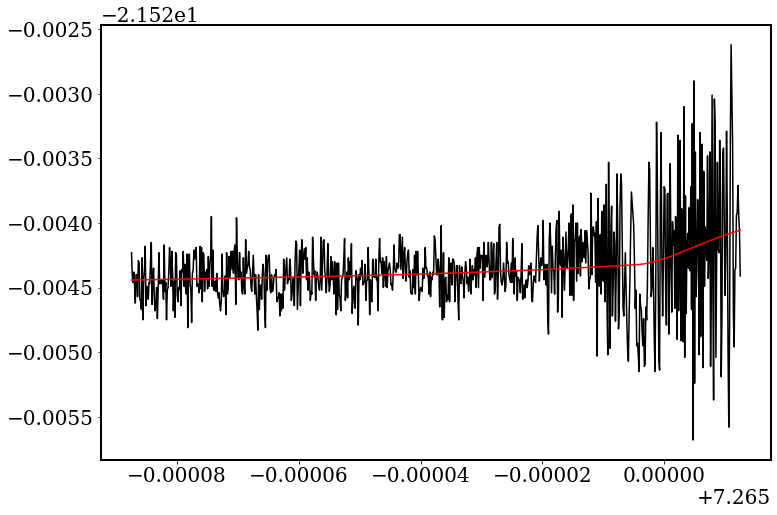

Q_factor =  4.91e+04 +/- 0.0759320922260304 	 |	 center = 7.264995298486597
RMSE =  0.000313446339367889
#===================================
Opening  Zoomed_peak34_23:03:03:21:46:41.dat ...


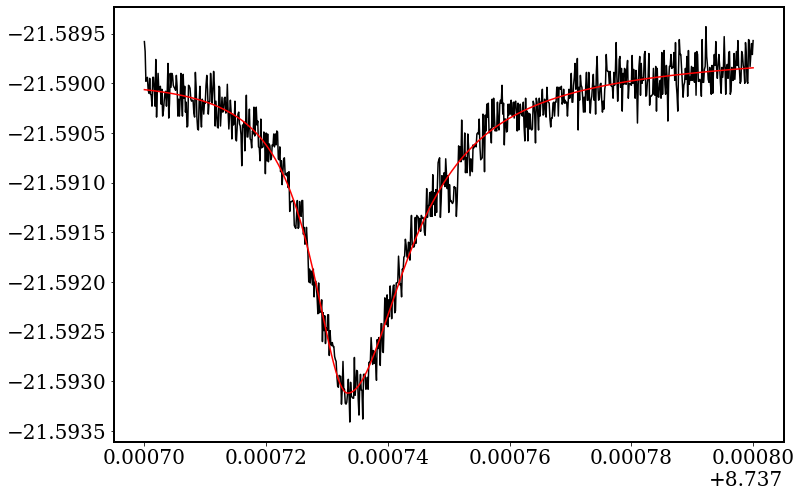

Q_factor =  4.58e+05 +/- 0.006667485888276134 	 |	 center = 8.737733417663959
RMSE =  0.0001598089468504511
#===================================
Opening  Zoomed_peak41_23:03:03:21:54:19.dat ...


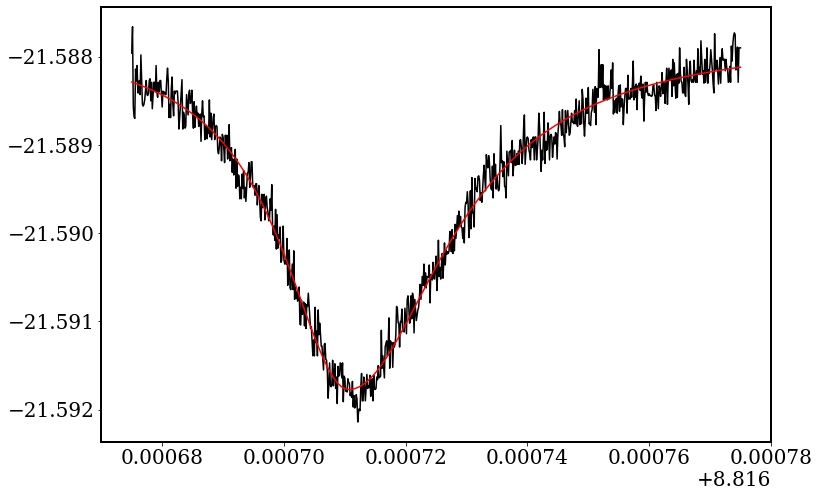

Q_factor =  2.67e+05 +/- 0.005091948210744869 	 |	 center = 8.816710661659934
RMSE =  0.00016693614601973164
#===================================
Opening  Zoomed_peak59_23:03:03:22:23:50.dat ...


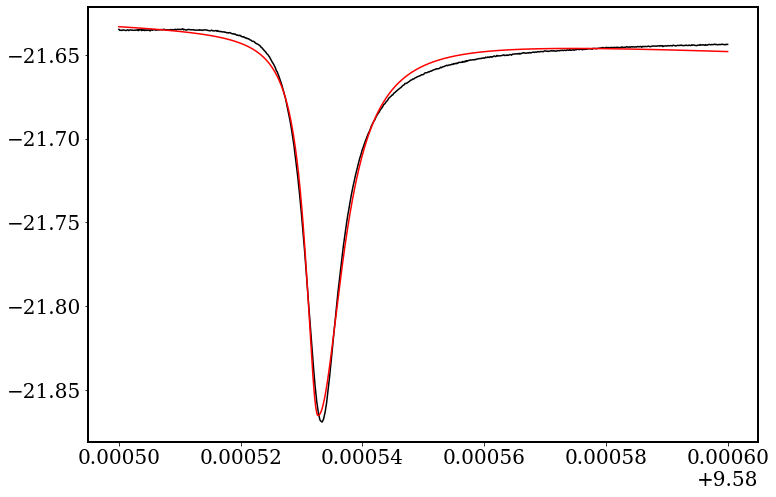

Q_factor =  1.30e+06 +/- 0.0028007819942385092 	 |	 center = 9.580532704443506
RMSE =  0.0034286684470021646
#===================================
Opening  Zoomed_peak36_23:03:03:21:48:59.dat ...


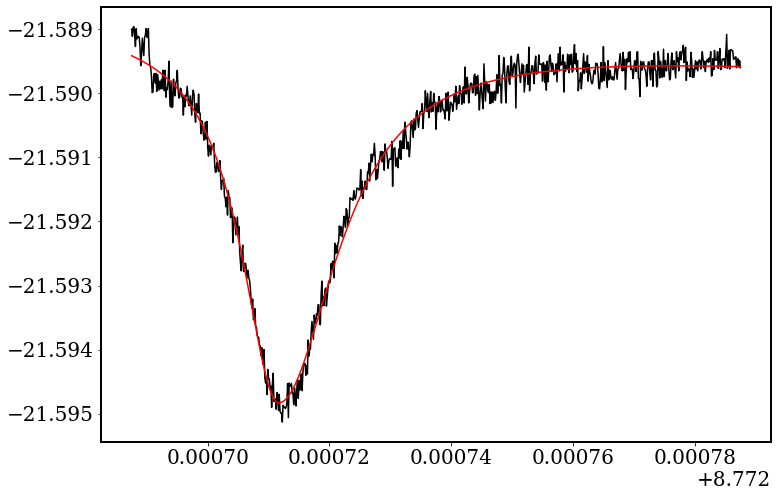

Q_factor =  4.57e+05 +/- 0.004365653988213325 	 |	 center = 8.77271161822568
RMSE =  0.0001874812170815535
#===================================
Opening  Zoomed_peak20_23:03:03:21:11:50.dat ...


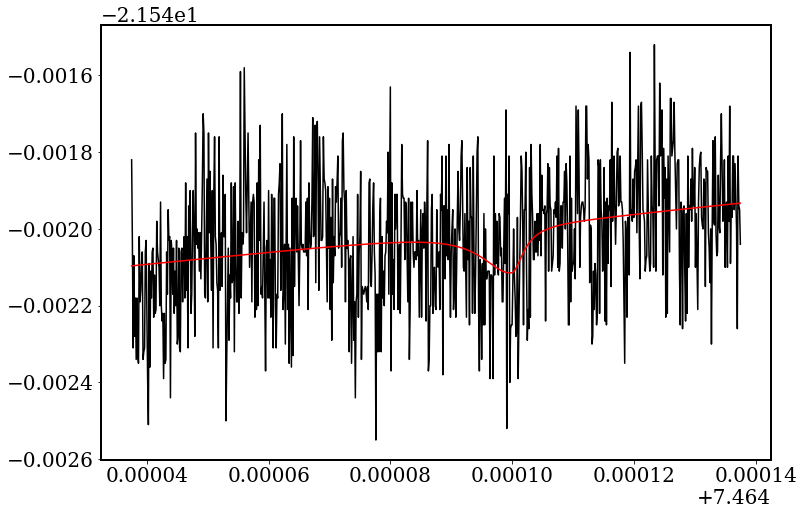

Q_factor =  8.92e+05 +/- 0.23024401135302752 	 |	 center = 7.4640999070332565
RMSE =  0.00015828620595821494
#===================================
Opening  Zoomed_peak51_23:03:03:22:11:43.dat ...


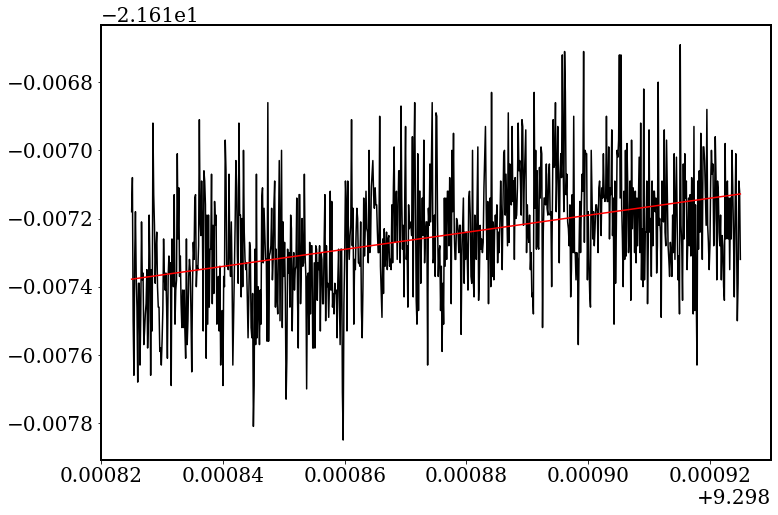

Q_factor =  4.65e+03 +/- 4.2334334834147425e-13 	 |	 center = 9.298825421760249
RMSE =  0.00016623386591985487
#===================================
Opening  Zoomed_peak31_23:03:03:21:43:08.dat ...


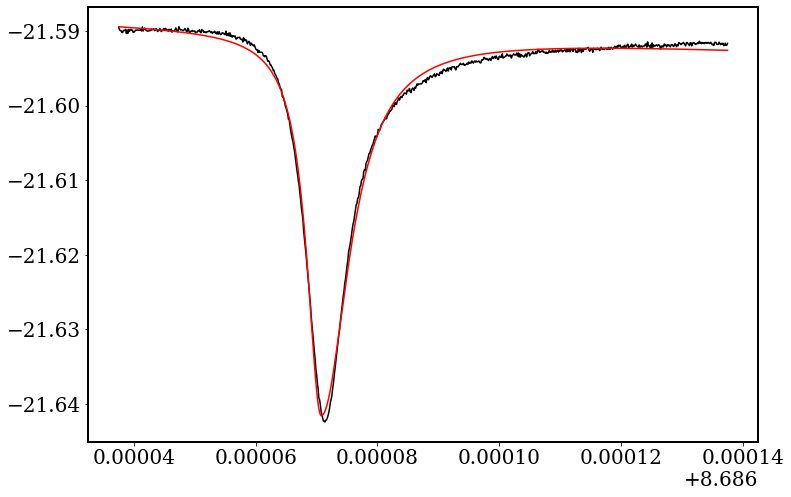

Q_factor =  1.04e+06 +/- 0.00260768901070468 	 |	 center = 8.686070758634582
RMSE =  0.0007508704381685375
#===================================
Opening  Zoomed_peak26_23:03:03:21:36:28.dat ...


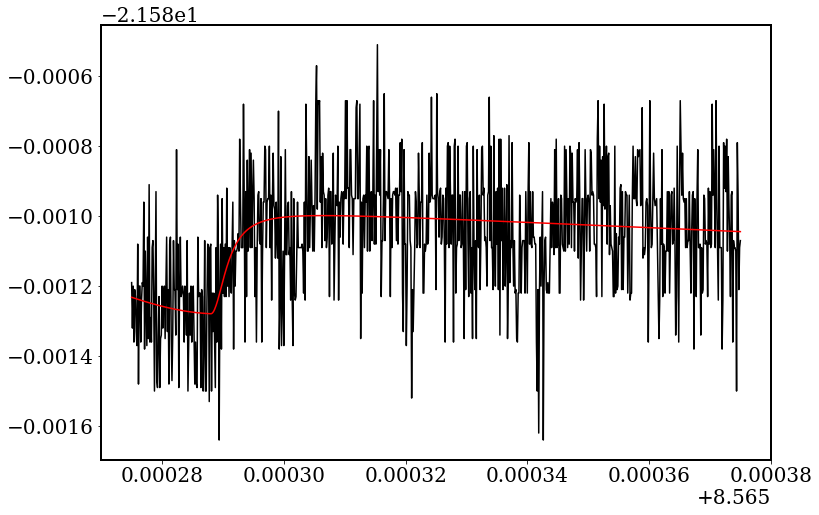

Q_factor =  2.27e+05 +/- 0.0315778056388907 	 |	 center = 8.565288009775431
RMSE =  0.00016201301782613097
#===================================
Opening  Zoomed_peak1_23:03:03:19:14:55.dat ...


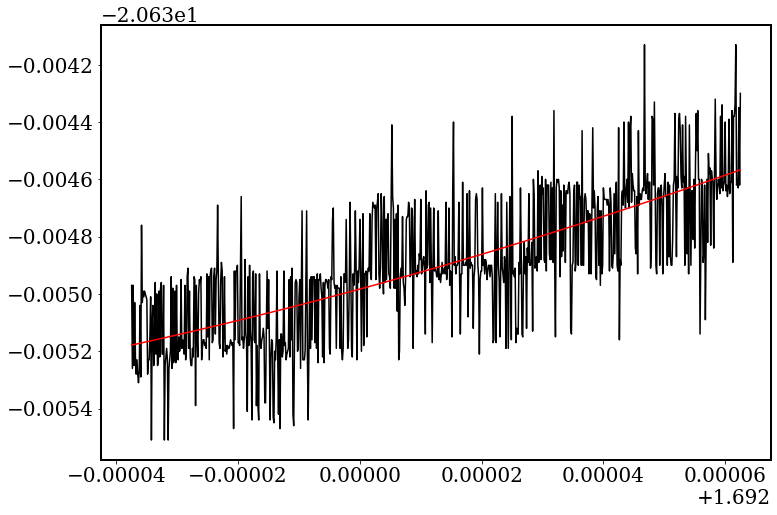

Q_factor =  8.97e+02 +/- 3.2223846576528214 	 |	 center = 1.6919625024992893
RMSE =  0.00016675218240821269
#===================================
Opening  Zoomed_peak90_23:03:03:23:56:48.dat ...


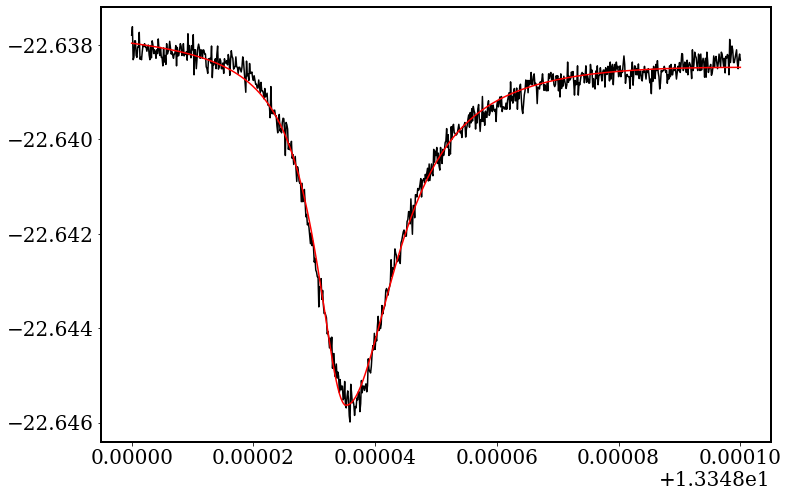

Q_factor =  8.26e+05 +/- 0.003428583342495761 	 |	 center = 13.34803520230052
RMSE =  0.00018651183718971435
#===================================
Opening  Zoomed_peak60_23:03:03:22:24:56.dat ...


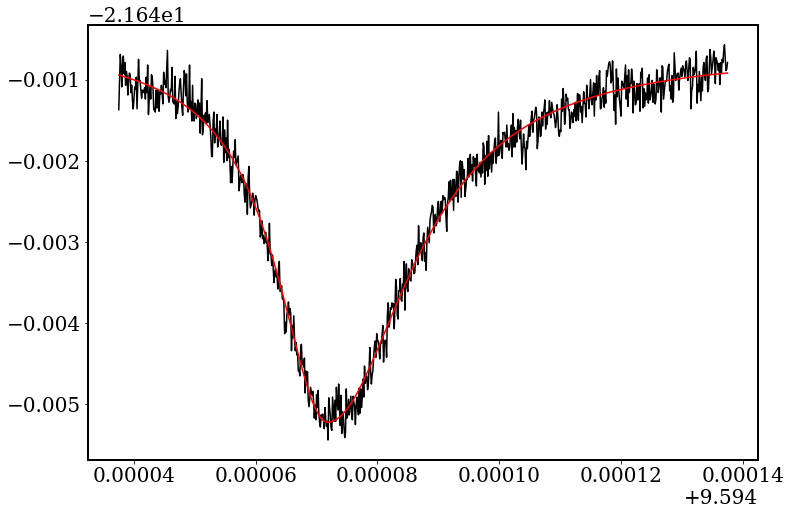

Q_factor =  3.56e+05 +/- 0.004564721954285517 	 |	 center = 9.594071781689424
RMSE =  0.00016979155788496815
#===================================
Opening  Zoomed_peak13_23:03:03:20:36:16.dat ...


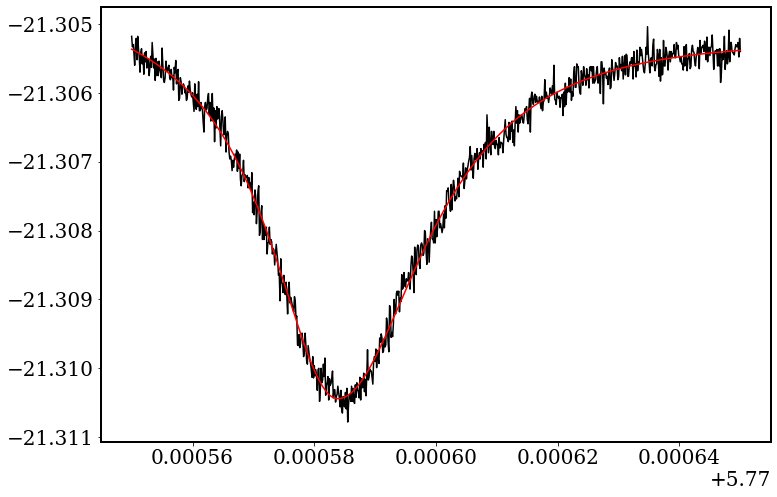

Q_factor =  1.82e+05 +/- 0.003309971033687773 	 |	 center = 5.770583756174149
RMSE =  0.00015442567070426963
#===================================
Opening  Zoomed_peak54_23:03:03:22:17:04.dat ...


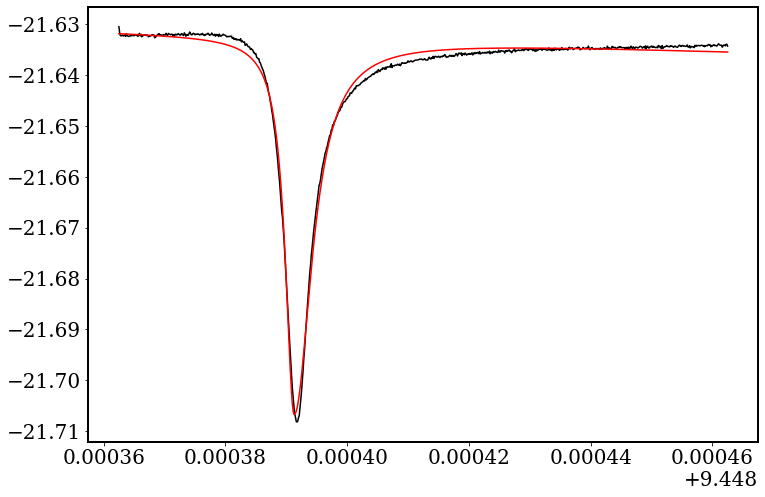

Q_factor =  1.79e+06 +/- 0.003459362828558115 	 |	 center = 9.44839129466424
RMSE =  0.0011838104411904238
#===================================
Opening  Zoomed_peak86_23:03:03:23:51:24.dat ...


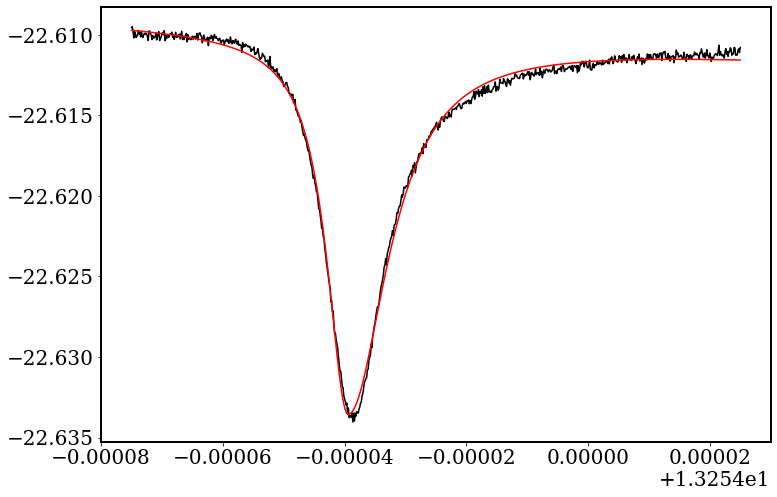

Q_factor =  1.09e+06 +/- 0.002337624915142211 	 |	 center = 13.253960572692252
RMSE =  0.00035671048665257885
#===================================
Opening  Zoomed_peak78_23:03:03:23:24:26.dat ...


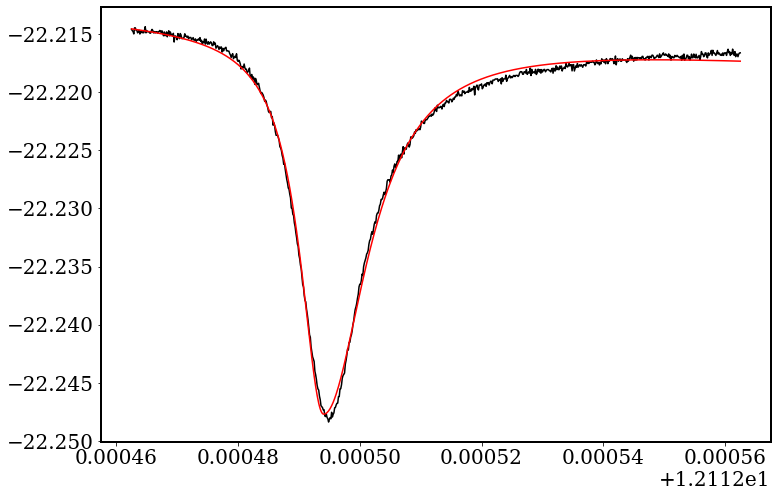

Q_factor =  9.08e+05 +/- 0.0020475183686455662 	 |	 center = 12.112494040357499
RMSE =  0.00045190788121293165
#===================================
Opening  Zoomed_peak83_23:03:03:23:46:35.dat ...


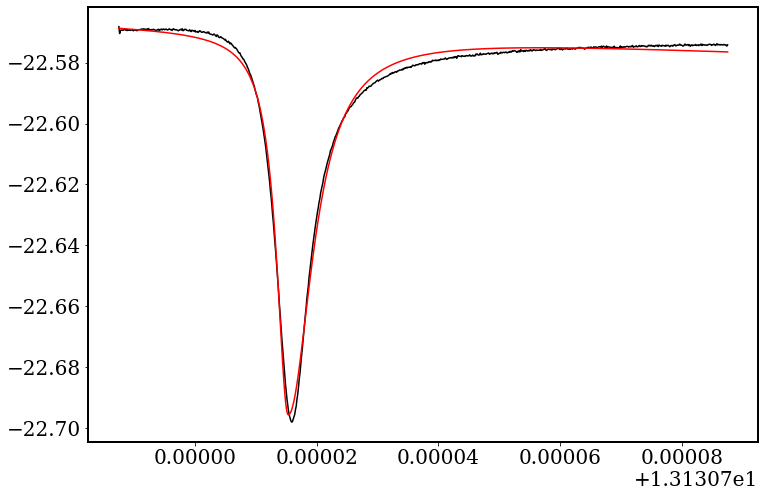

Q_factor =  1.84e+06 +/- 0.0029731568003659135 	 |	 center = 13.13071531791937
RMSE =  0.0019961208604370507
#===================================
Opening  Zoomed_peak50_23:03:03:22:08:54.dat ...


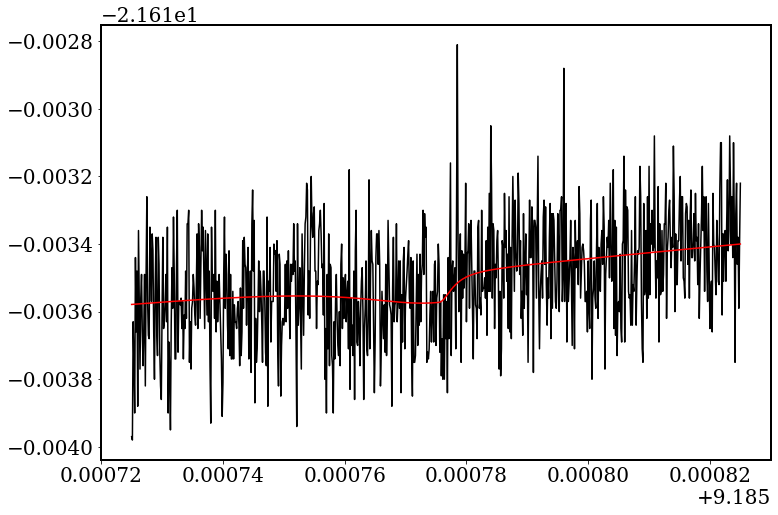

Q_factor =  4.80e+05 +/- 0.1564760735726612 	 |	 center = 9.185775480187727
RMSE =  0.00015354099560914883
#===================================
Opening  Zoomed_peak7_23:03:03:20:21:48.dat ...


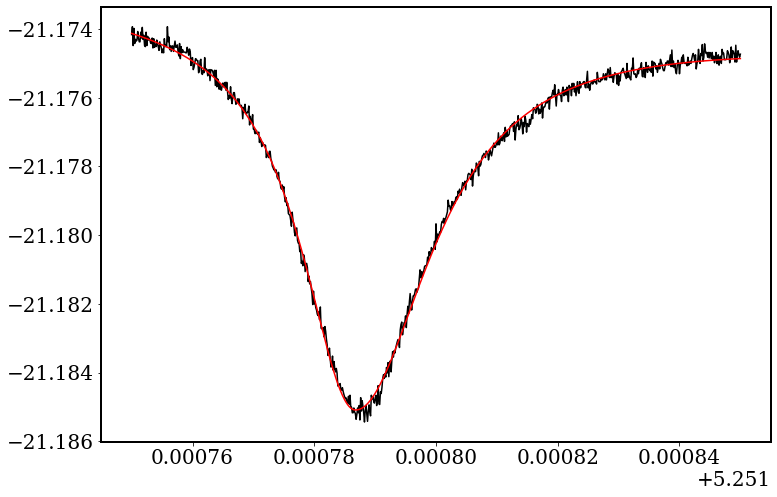

Q_factor =  2.02e+05 +/- 0.0018575395963384873 	 |	 center = 5.251786697319607
RMSE =  0.00016723389801636865
#===================================
Opening  Zoomed_peak68_23:03:03:22:34:20.dat ...


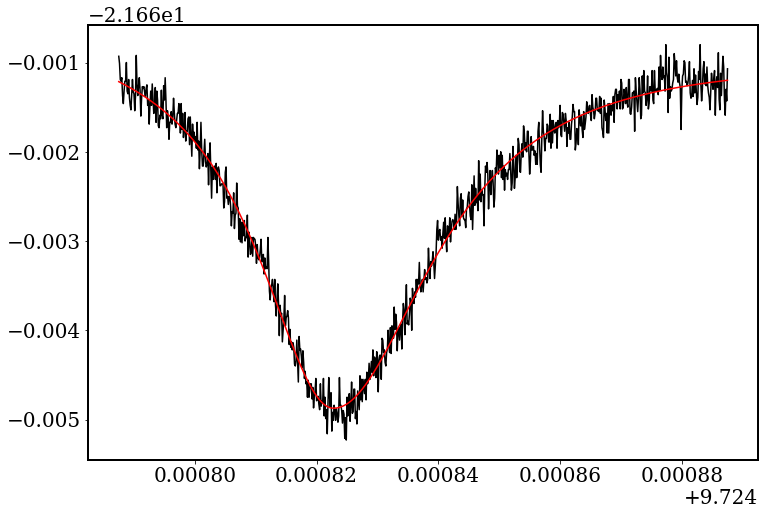

Q_factor =  2.75e+05 +/- 0.0044750918860131895 	 |	 center = 9.724822687034992
RMSE =  0.0001565071930966341
#===================================
Opening  Zoomed_peak12_23:03:03:20:34:39.dat ...


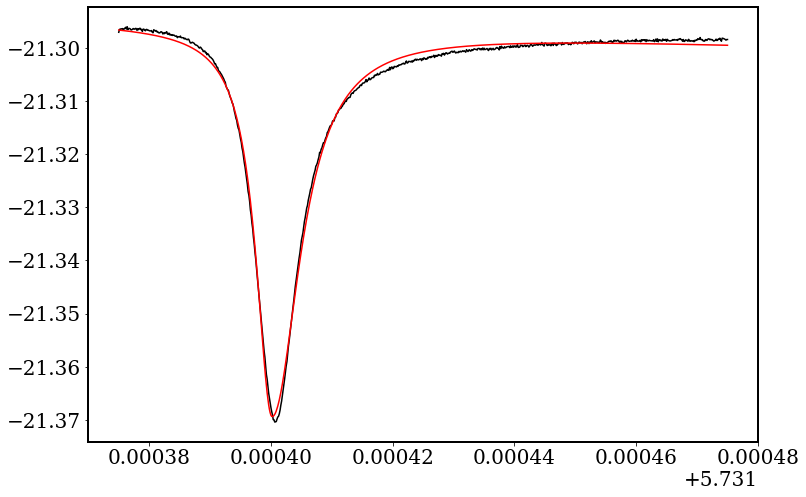

Q_factor =  6.56e+05 +/- 0.0022760429044750975 	 |	 center = 5.731400189606101
RMSE =  0.0009250962940270184
#===================================
Opening  Zoomed_peak82_23:03:03:23:33:37.dat ...


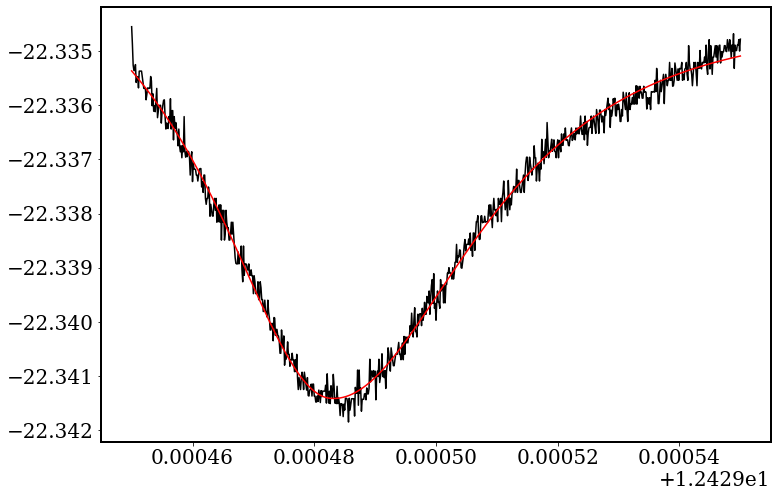

Q_factor =  2.28e+05 +/- 0.002391256128234748 	 |	 center = 12.429482549147506
RMSE =  0.00018462338637841055
#===================================
Opening  Zoomed_peak84_23:03:03:23:48:32.dat ...


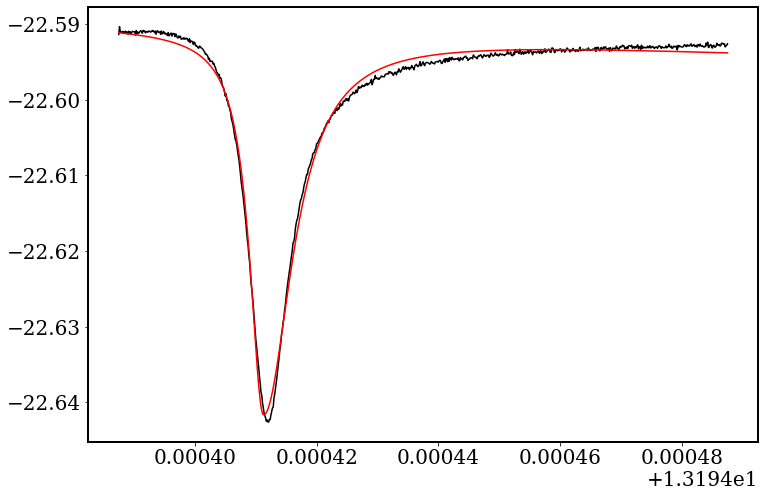

Q_factor =  1.55e+06 +/- 0.0029209080519033833 	 |	 center = 13.194411280142116
RMSE =  0.0008501081003101707
#===================================
Opening  Zoomed_peak15_23:03:03:20:56:53.dat ...


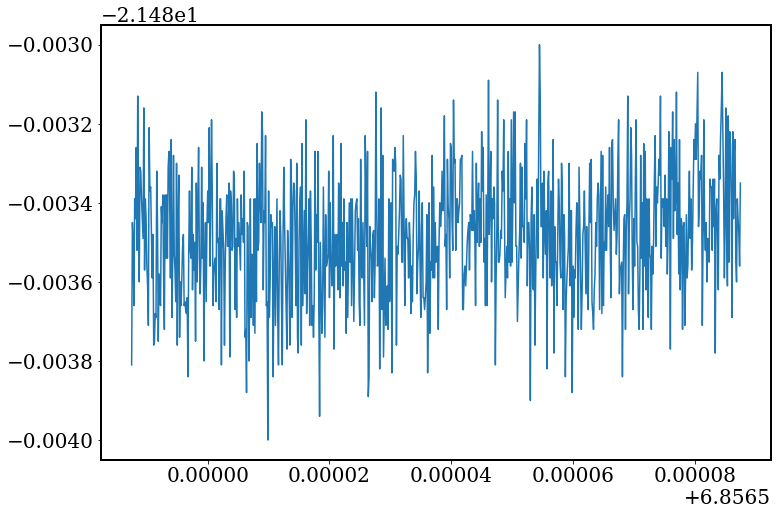

There was a problem during the fit!
#===================================
Opening  Zoomed_peak5_23:03:03:19:55:18.dat ...


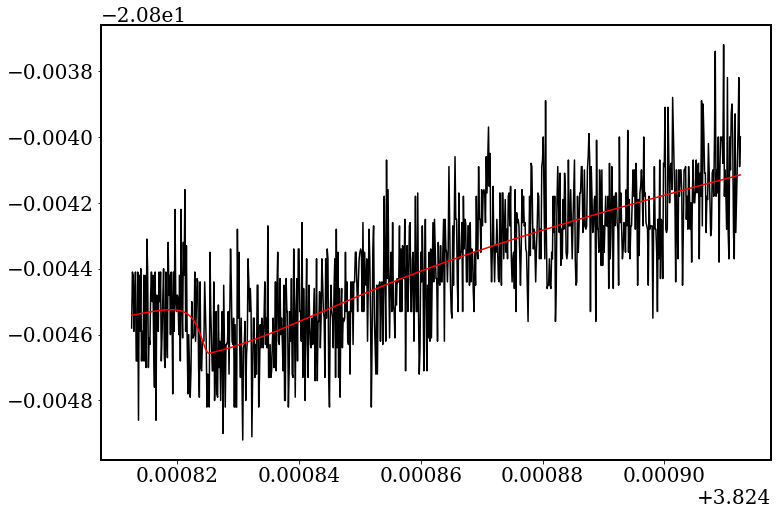

Q_factor =  1.13e+05 +/- 0.03811401855257202 	 |	 center = 3.824825268765769
RMSE =  0.0001371010733379043
#===================================
Opening  Zoomed_peak9_23:03:03:20:24:30.dat ...


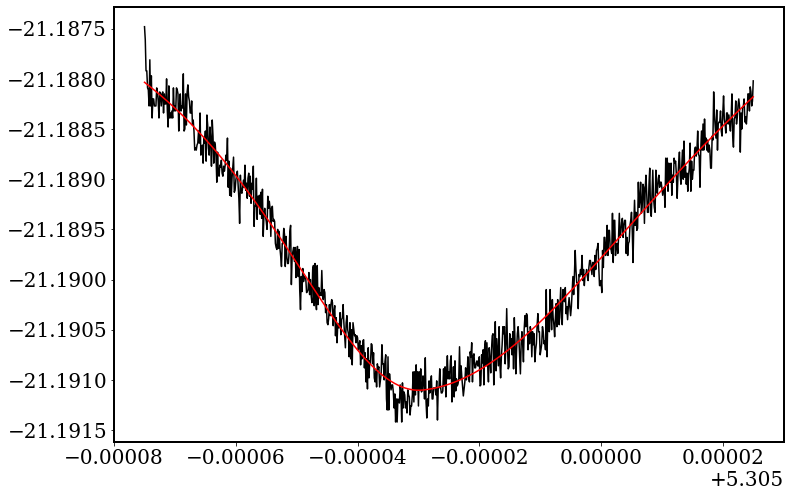

Q_factor =  5.79e+04 +/- 0.0028437312793921925 	 |	 center = 5.304970862862846
RMSE =  0.0001577696193268822
#===================================
Opening  Zoomed_peak32_23:03:03:21:44:00.dat ...


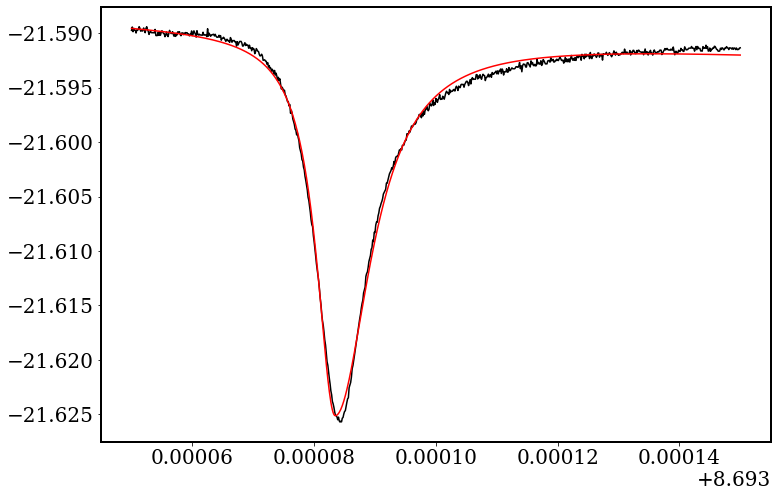

Q_factor =  8.08e+05 +/- 0.0023207559872809726 	 |	 center = 8.693083449204362
RMSE =  0.000504480005630934
#===================================
Opening  Zoomed_peak69_23:03:03:22:35:26.dat ...


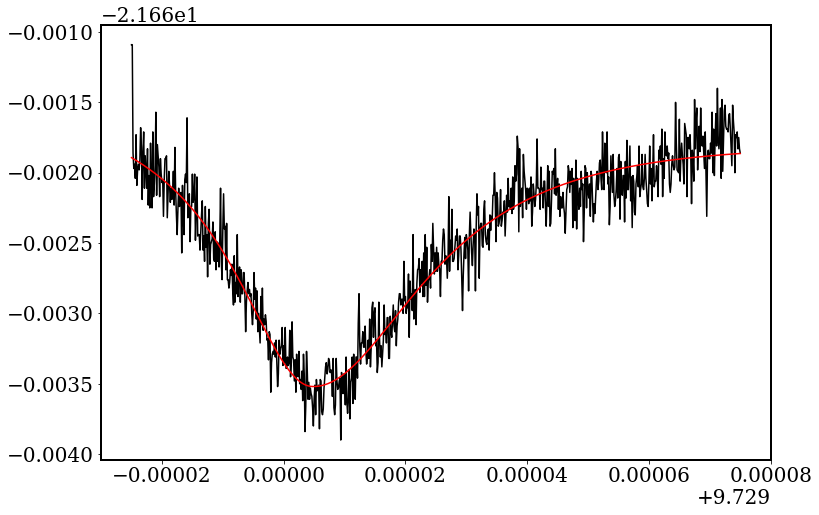

Q_factor =  2.50e+05 +/- 0.009874998097896522 	 |	 center = 9.729004611361718
RMSE =  0.00016901100310241603
#===================================
Opening  Zoomed_peak37_23:03:03:21:50:05.dat ...


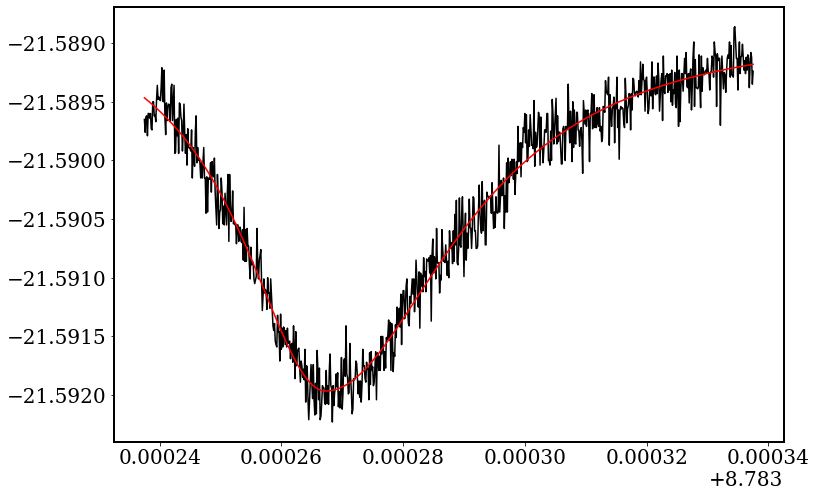

Q_factor =  2.04e+05 +/- 0.005679369379174072 	 |	 center = 8.78326717895279
RMSE =  0.00016081490306087004
#===================================
Opening  Zoomed_peak30_23:03:03:21:42:03.dat ...


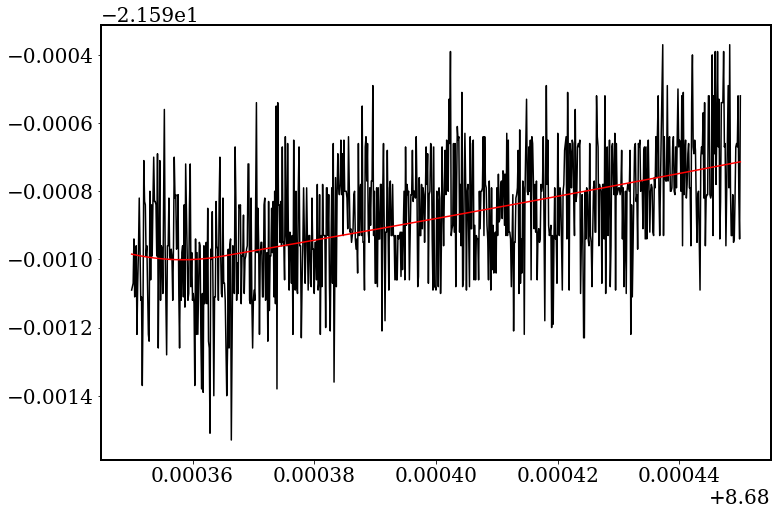

Q_factor =  7.10e+03 +/- 0.02923414055891187 	 |	 center = 8.680364632263064
RMSE =  0.00016163585571605661
#===================================
Opening  Zoomed_peak72_23:03:03:22:38:39.dat ...


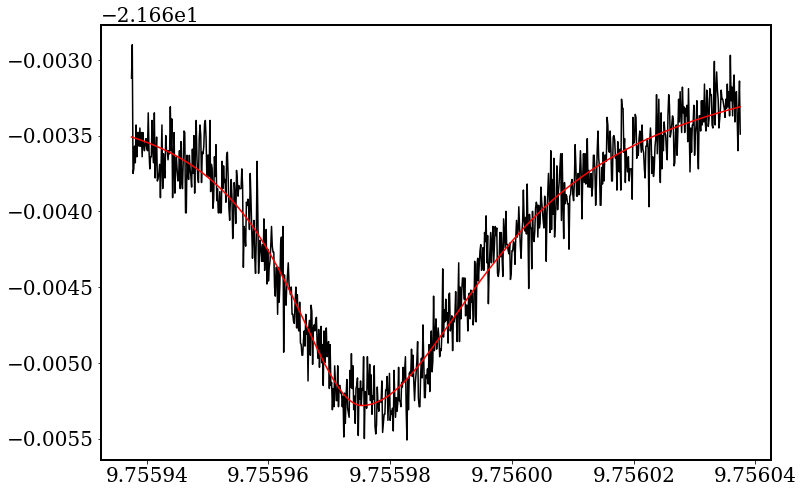

Q_factor =  2.34e+05 +/- 0.008205659122446042 	 |	 center = 9.75597549978281
RMSE =  0.0001538928647961026
#===================================
Opening  Zoomed_peak4_23:03:03:19:50:36.dat ...


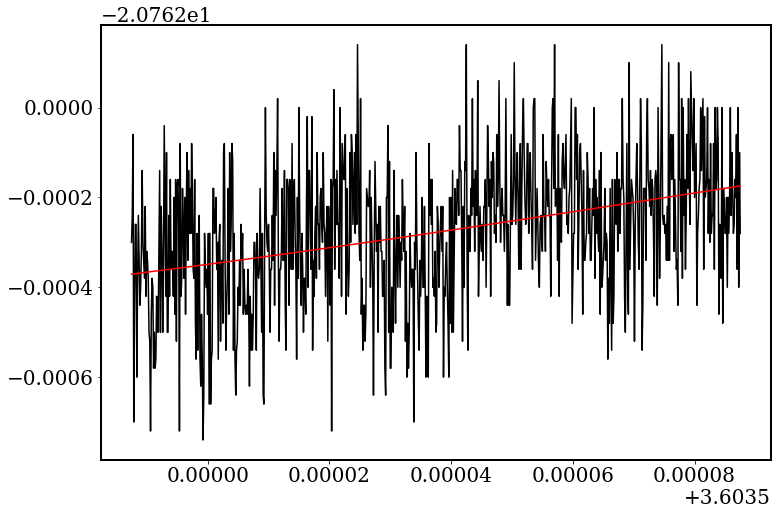

Q_factor =  1.26e+04 +/- 22.581402413419948 	 |	 center = 3.6034875000000004
RMSE =  0.00014721534944211055
#===================================
Opening  Zoomed_peak77_23:03:03:23:22:09.dat ...


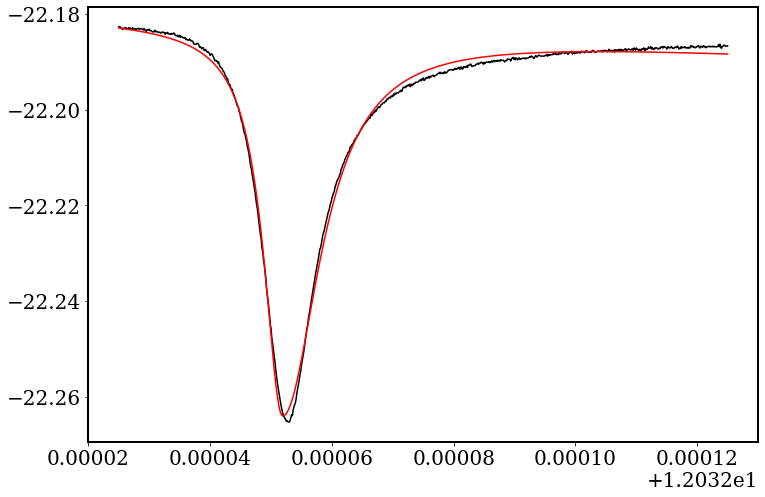

Q_factor =  1.08e+06 +/- 0.0023194140311276227 	 |	 center = 12.032051892594916
RMSE =  0.0011939527824890944
#===================================
Opening  Zoomed_peak91_23:03:03:23:58:04.dat ...


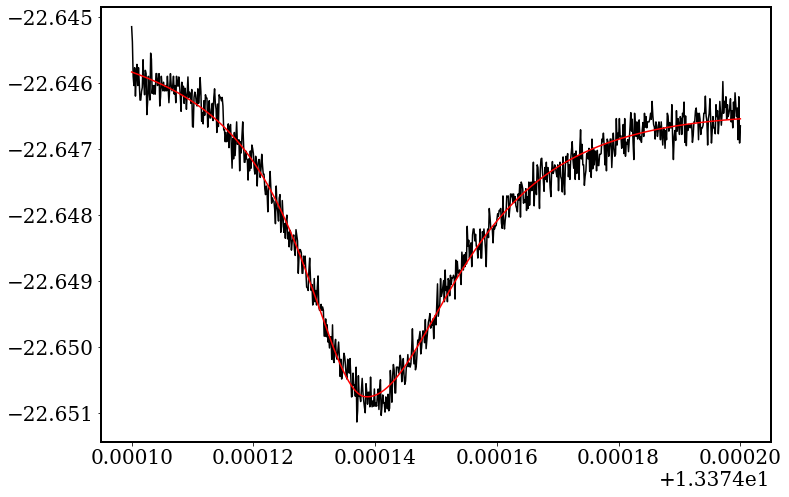

Q_factor =  4.08e+05 +/- 0.004506572226862957 	 |	 center = 13.374138386053184
RMSE =  0.00019220186457323985
#===================================
Opening  Zoomed_peak46_23:03:03:22:00:04.dat ...


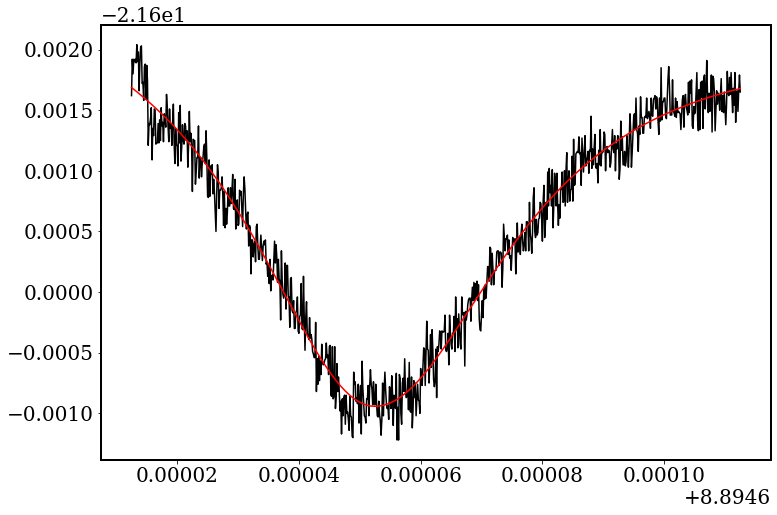

Q_factor =  1.69e+05 +/- 0.0051472561500636145 	 |	 center = 8.894652085745284
RMSE =  0.00015526902350092346
#===================================
Opening  Zoomed_peak21_23:03:03:21:17:45.dat ...


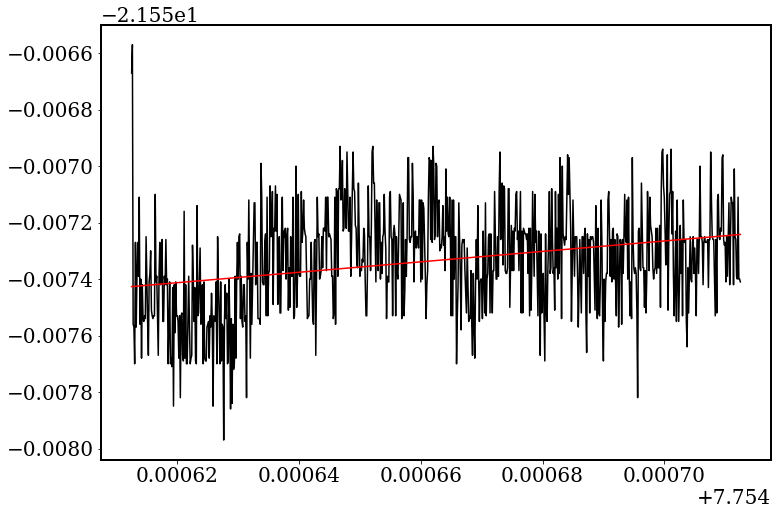

Q_factor =  3.88e+03 +/- 7.554423721113648e-15 	 |	 center = 7.7546127293353155
RMSE =  0.00017803160271451221
#===================================
Opening  Zoomed_peak39_23:03:03:21:52:22.dat ...


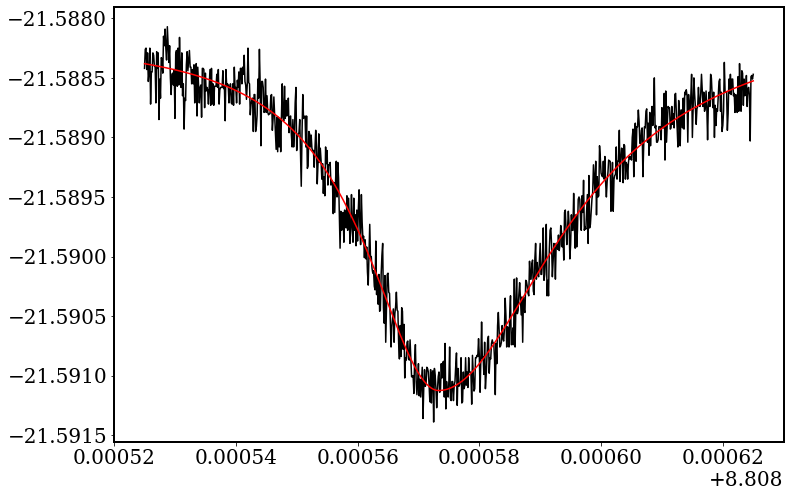

Q_factor =  2.26e+05 +/- 0.0058928895657147035 	 |	 center = 8.808573394949343
RMSE =  0.0001593411213212536
#===================================
Opening  Zoomed_peak75_23:03:03:22:42:50.dat ...


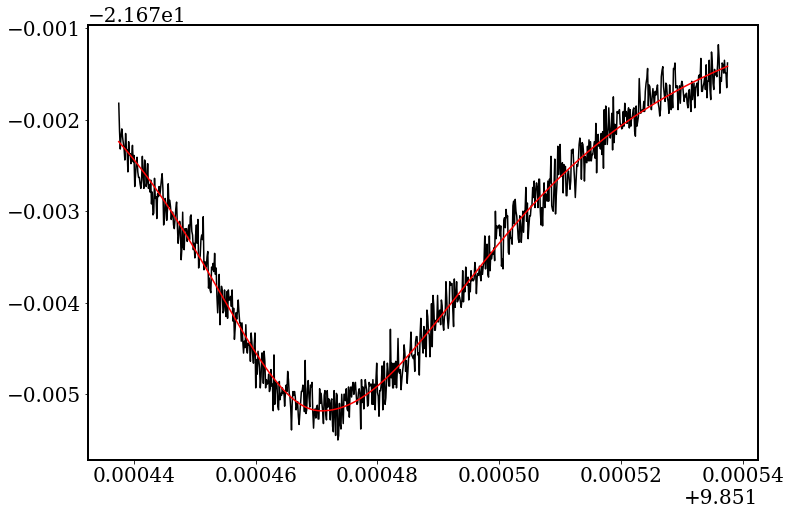

Q_factor =  1.47e+05 +/- 0.003351366994766214 	 |	 center = 9.85147071523785
RMSE =  0.0001601227687884553
#===================================
Opening  Zoomed_peak56_23:03:03:22:19:35.dat ...


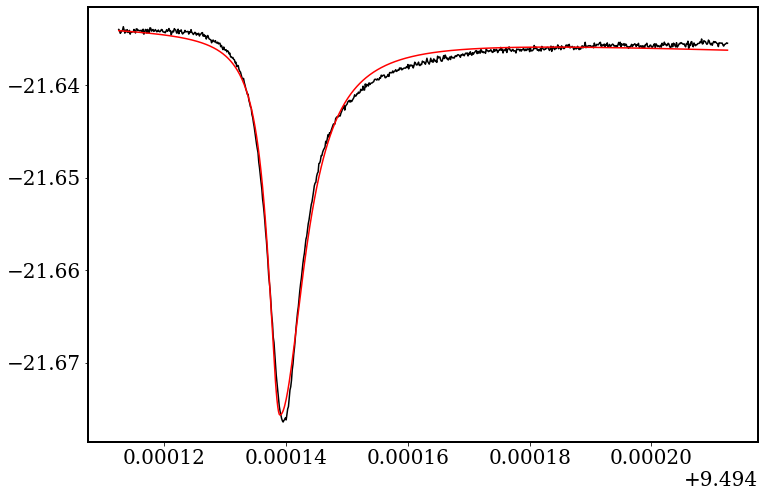

Q_factor =  1.30e+06 +/- 0.0030895070245239836 	 |	 center = 9.494138968853392
RMSE =  0.0006863006626423628
#===================================
Opening  Zoomed_peak47_23:03:03:22:01:19.dat ...


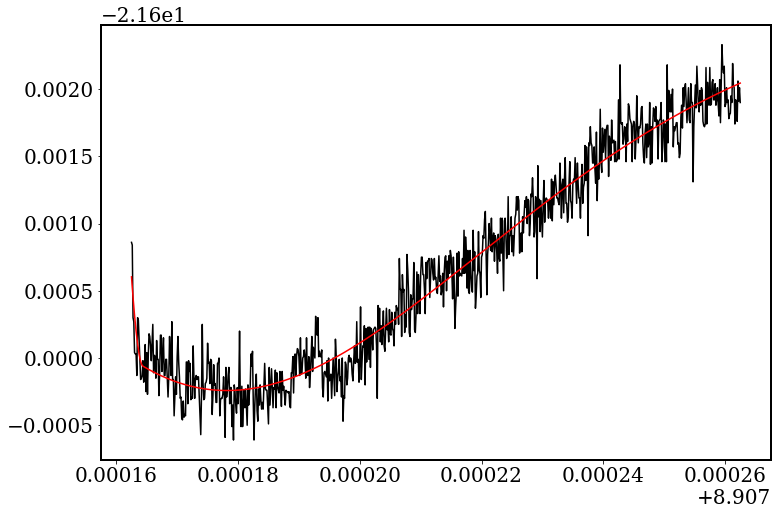

Q_factor =  8.70e+04 +/- 0.003877055022439661 	 |	 center = 8.907164372804678
RMSE =  0.00016599681651419877
#===================================
Opening  Zoomed_peak40_23:03:03:21:53:14.dat ...


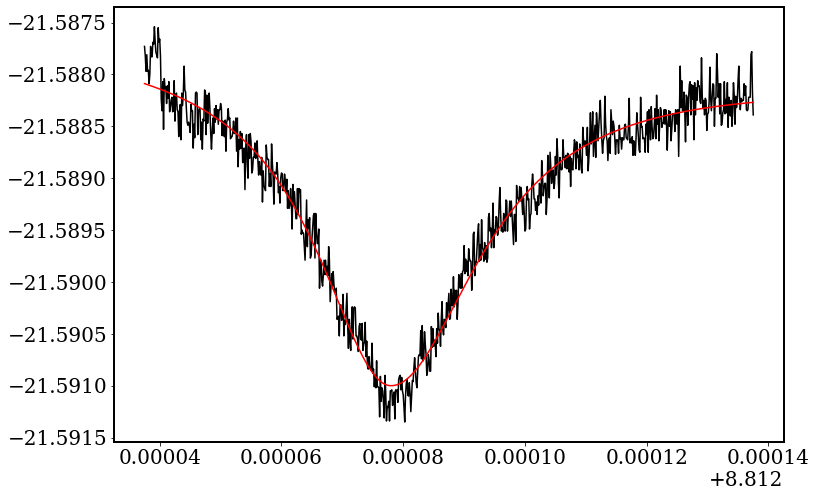

Q_factor =  2.68e+05 +/- 0.006721175209318034 	 |	 center = 8.812077862941806
RMSE =  0.00017302016856003767
#===================================
Opening  Zoomed_peak38_23:03:03:21:51:31.dat ...


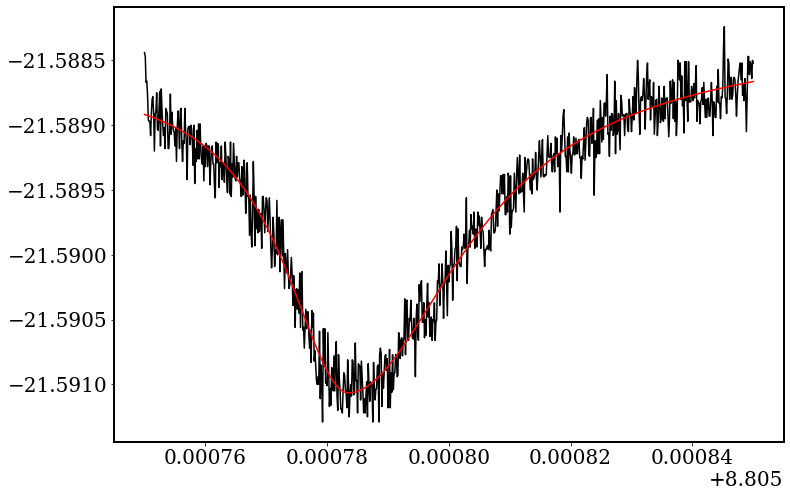

Q_factor =  2.46e+05 +/- 0.007175515421411609 	 |	 center = 8.805783580672603
RMSE =  0.00015538362567382407
#===================================
Opening  Zoomed_peak6_23:03:03:20:19:40.dat ...


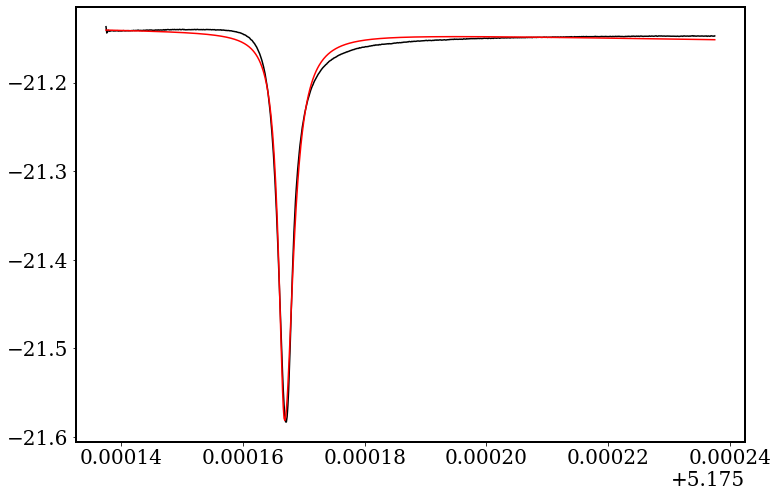

Q_factor =  1.80e+06 +/- 0.0038690336826322173 	 |	 center = 5.175166840585002
RMSE =  0.005519536222575675
#===================================
Opening  Zoomed_peak73_23:03:03:22:39:30.dat ...


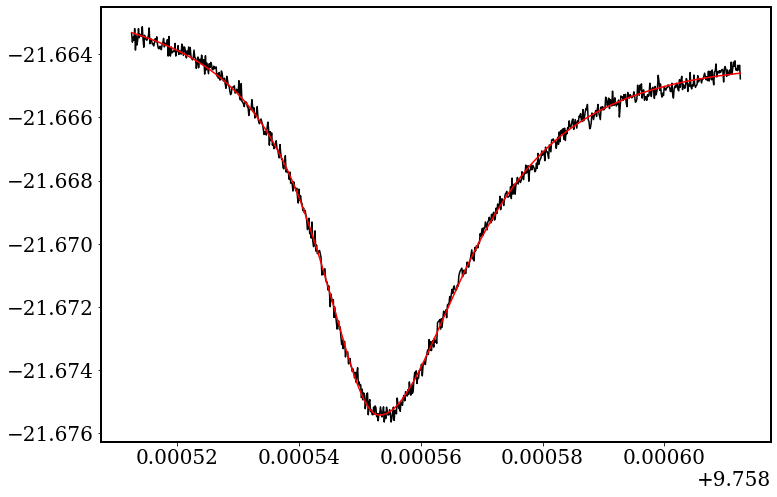

Q_factor =  3.19e+05 +/- 0.0016394634524644345 	 |	 center = 9.75855304520067
RMSE =  0.00016968441395145072
#===================================
Opening  Zoomed_peak62_23:03:03:22:27:48.dat ...


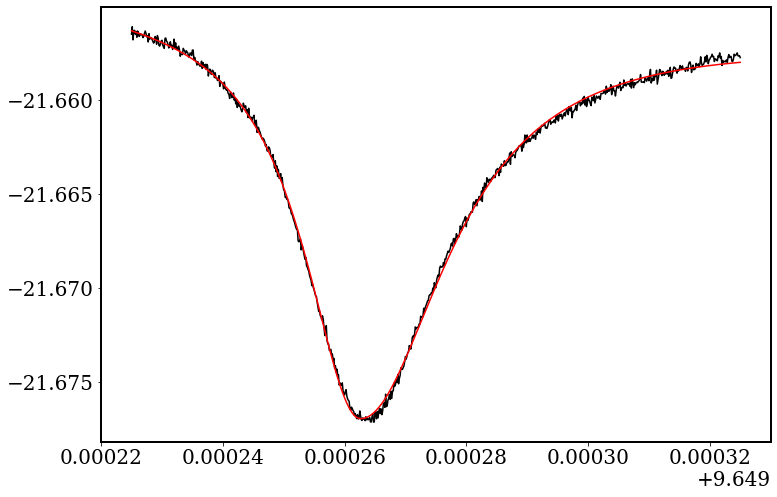

Q_factor =  3.35e+05 +/- 0.0013005587898712297 	 |	 center = 9.649262539611236
RMSE =  0.00022837156643377366
#===================================
Opening  Zoomed_peak14_23:03:03:20:49:36.dat ...


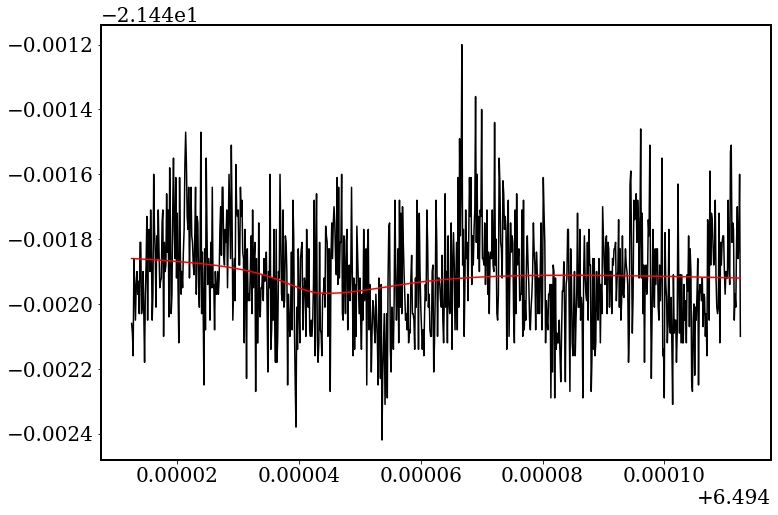

Q_factor =  2.47e+05 +/- 0.21136253038612396 	 |	 center = 6.494043743427946
RMSE =  0.00016433971493585783
#===================================
Opening  Zoomed_peak43_23:03:03:21:57:01.dat ...


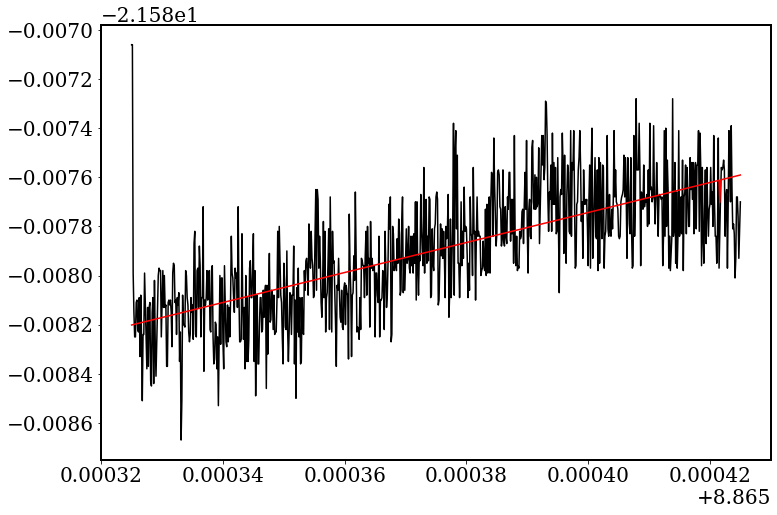

Q_factor =  1.24e+09 +/- 739.7431502982922 	 |	 center = 8.865421629281915
RMSE =  0.0001781872730164719
#===================================
Opening  Zoomed_peak8_23:03:03:20:22:53.dat ...


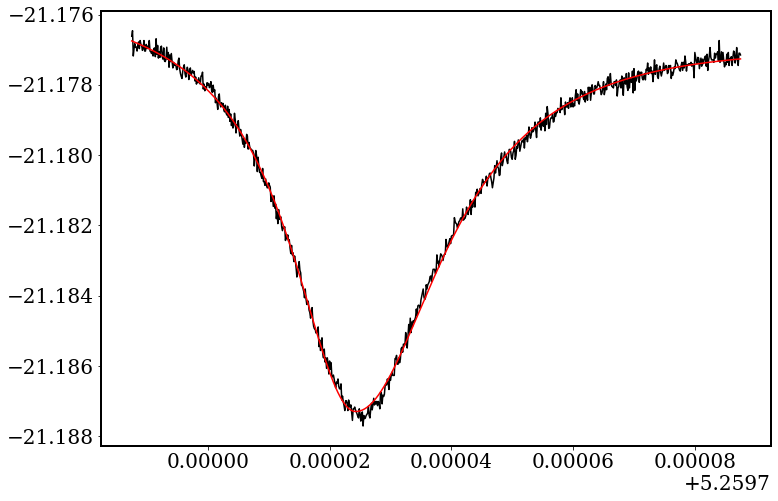

Q_factor =  1.70e+05 +/- 0.0017699709712700417 	 |	 center = 5.259724175740587
RMSE =  0.00016431552240719438
#===================================
Opening  Zoomed_peak10_23:03:03:20:31:27.dat ...


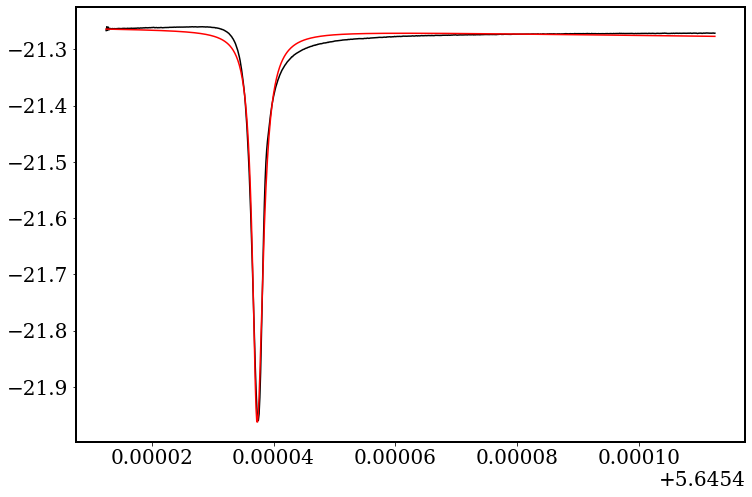

Q_factor =  2.70e+06 +/- 0.004883306314497209 	 |	 center = 5.645437307299015
RMSE =  0.009357737968111892
#===================================
Opening  Zoomed_peak44_23:03:03:21:58:07.dat ...


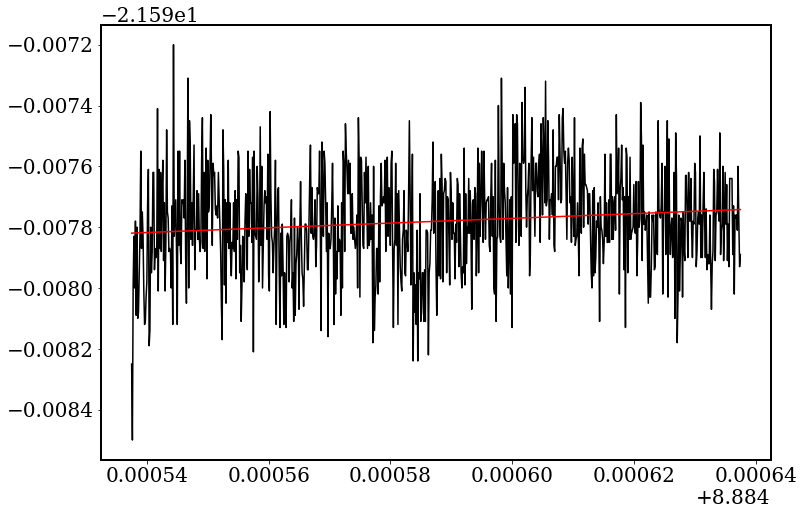

Q_factor =  4.85e+03 +/- 2.300365561652165e-14 	 |	 center = 8.88453750363724
RMSE =  0.00017128566558369945
#===================================
Opening  Zoomed_peak71_23:03:03:22:37:33.dat ...


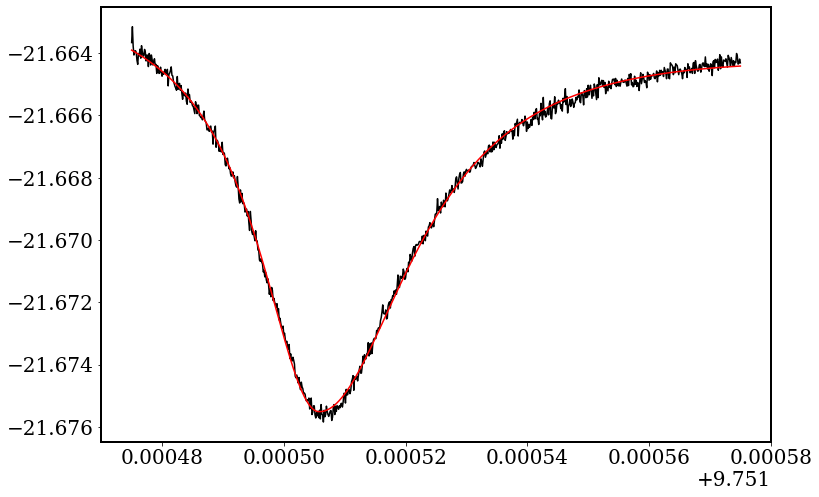

Q_factor =  3.11e+05 +/- 0.0015876920726624875 	 |	 center = 9.751505674229309
RMSE =  0.0001694953079377208
#===================================
Opening  Zoomed_peak64_23:03:03:22:29:45.dat ...


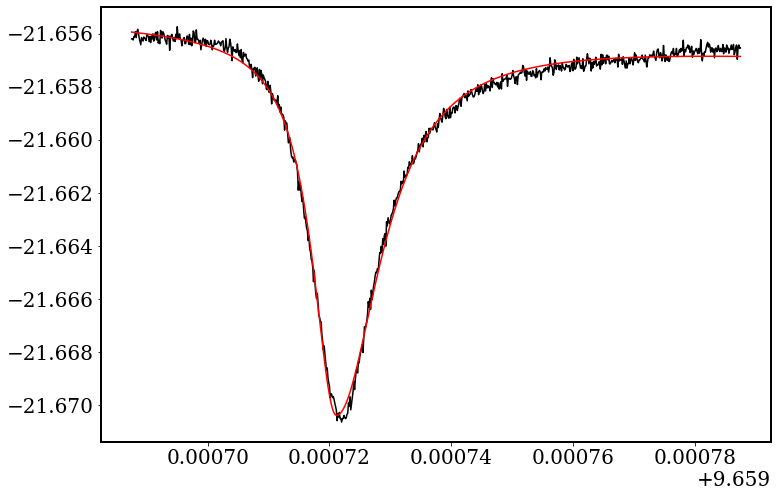

Q_factor =  7.11e+05 +/- 0.0024604823193577346 	 |	 center = 9.659721114701838
RMSE =  0.00023804845774797606
#===================================
Opening  Zoomed_peak42_23:03:03:21:55:25.dat ...


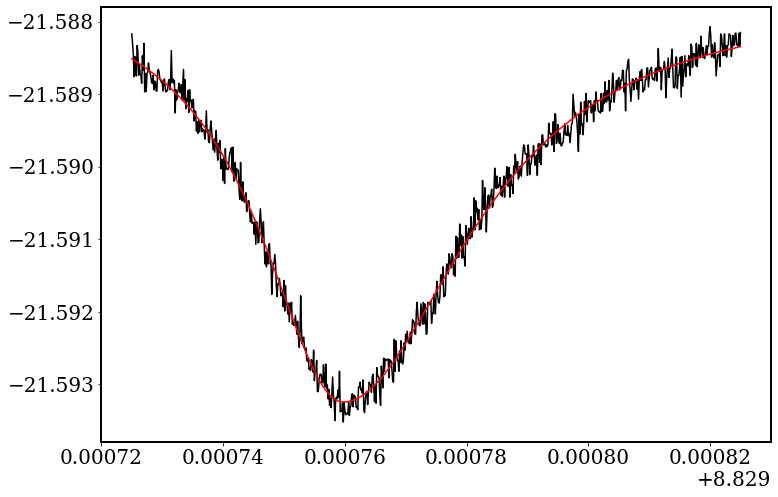

Q_factor =  2.11e+05 +/- 0.003202233459057804 	 |	 center = 8.829759632381858
RMSE =  0.00015755601535731998
#===================================
Opening  Zoomed_peak63_23:03:03:22:28:39.dat ...


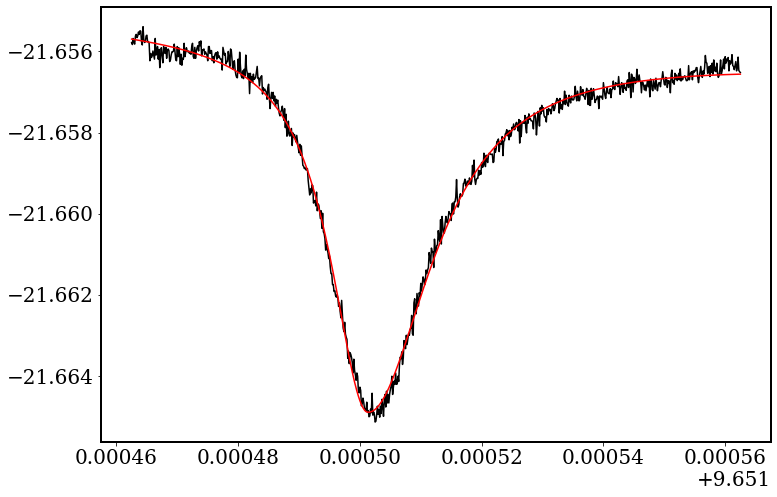

Q_factor =  4.78e+05 +/- 0.002795447364625919 	 |	 center = 9.65150130383531
RMSE =  0.00019478344681075308
#===================================
Opening  Zoomed_peak48_23:03:03:22:02:25.dat ...


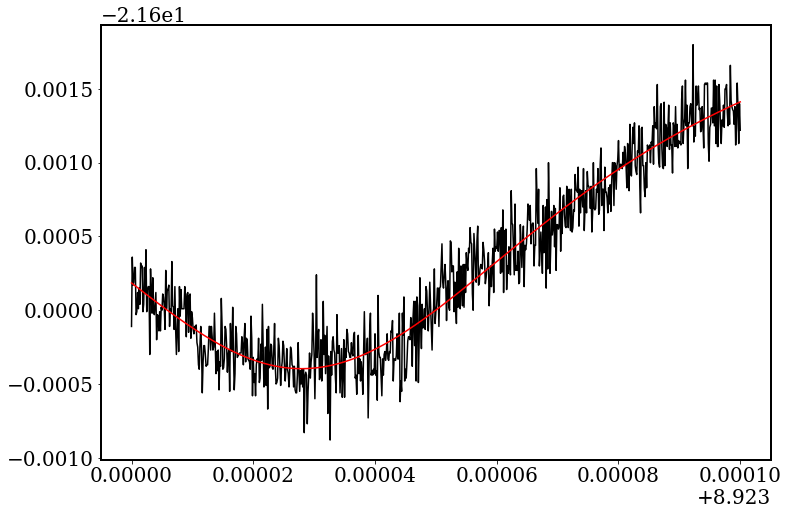

Q_factor =  8.41e+04 +/- 0.032689790361444024 	 |	 center = 8.923028547970134
RMSE =  0.00016490409210002637
#===================================
Opening  Zoomed_peak66_23:03:03:22:31:28.dat ...


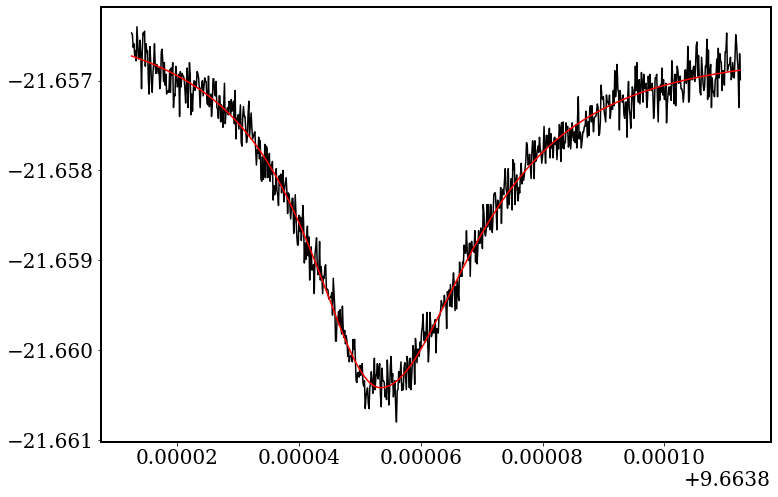

Q_factor =  2.84e+05 +/- 0.004819674267799599 	 |	 center = 9.663853311283207
RMSE =  0.00016060278134169068
#===================================
Opening  Zoomed_peak57_23:03:03:22:21:22.dat ...


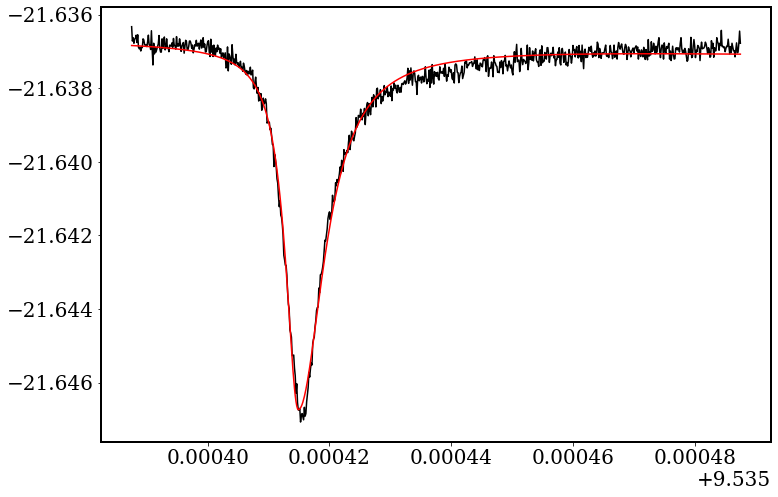

Q_factor =  1.24e+06 +/- 0.004031489990702486 	 |	 center = 9.535414881590286
RMSE =  0.00021747260491200693
#===================================
Opening  Zoomed_peak23_23:03:03:21:29:35.dat ...


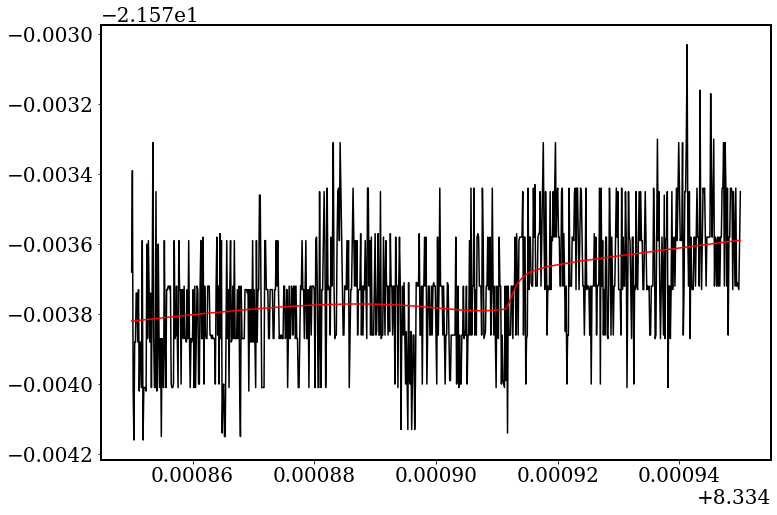

Q_factor =  4.00e+05 +/- 0.09792612926987346 	 |	 center = 8.334911292208215
RMSE =  0.00015555786630223678
#===================================
Opening  Zoomed_peak80_23:03:03:23:27:49.dat ...


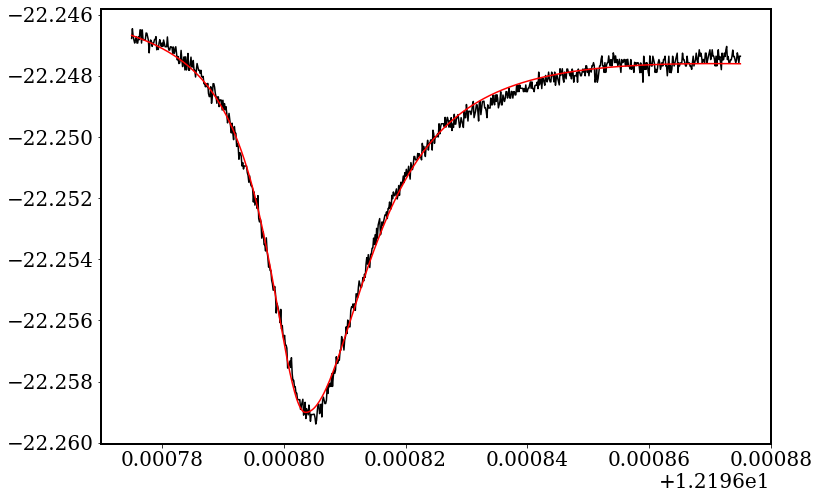

Q_factor =  5.90e+05 +/- 0.0022348601749732845 	 |	 center = 12.196803510369442
RMSE =  0.0002177686731984108
#===================================
Opening  Zoomed_peak70_23:03:03:22:36:17.dat ...


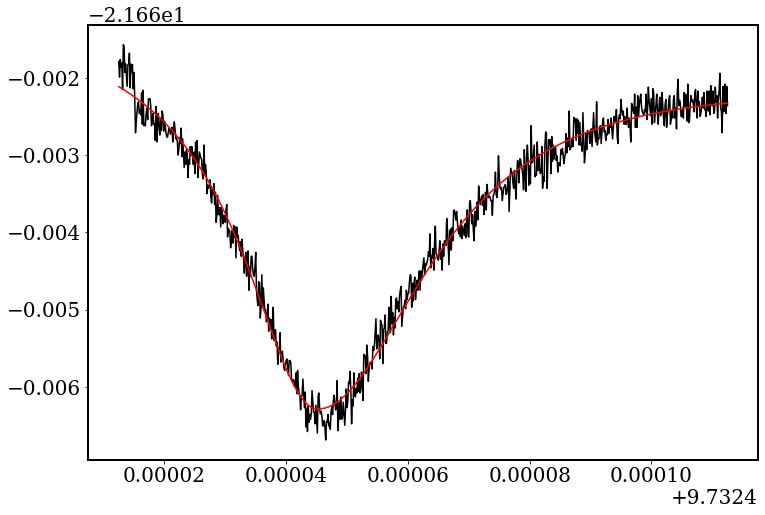

Q_factor =  2.60e+05 +/- 0.004301658877209152 	 |	 center = 9.732444980505907
RMSE =  0.00017521404072646894
#===================================
Opening  Zoomed_peak35_23:03:03:21:48:08.dat ...


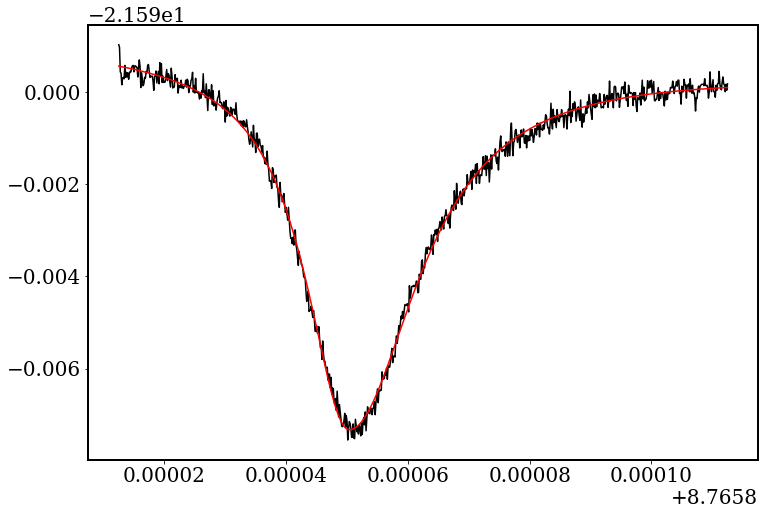

Q_factor =  3.89e+05 +/- 0.002616295067184745 	 |	 center = 8.76585031382223
RMSE =  0.00016299051603234485
#===================================
Opening  Zoomed_peak55_23:03:03:22:18:20.dat ...


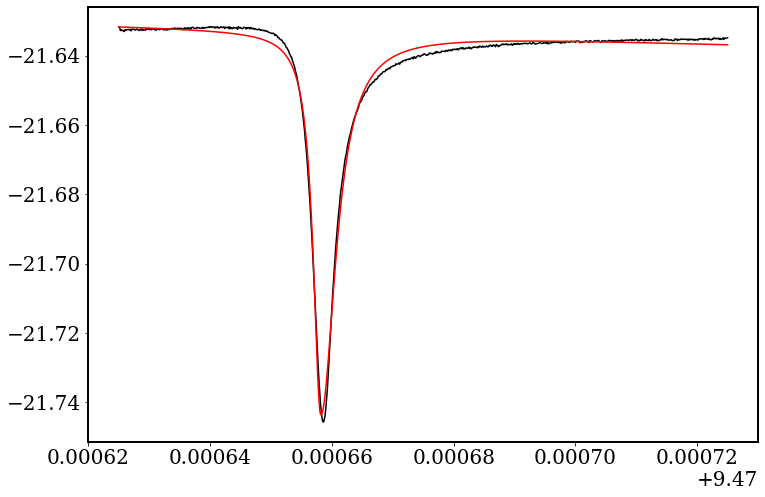

Q_factor =  2.12e+06 +/- 0.003684026019691491 	 |	 center = 9.470658168595259
RMSE =  0.0017403023615566397
#===================================
Opening  Zoomed_peak11_23:03:03:20:33:13.dat ...


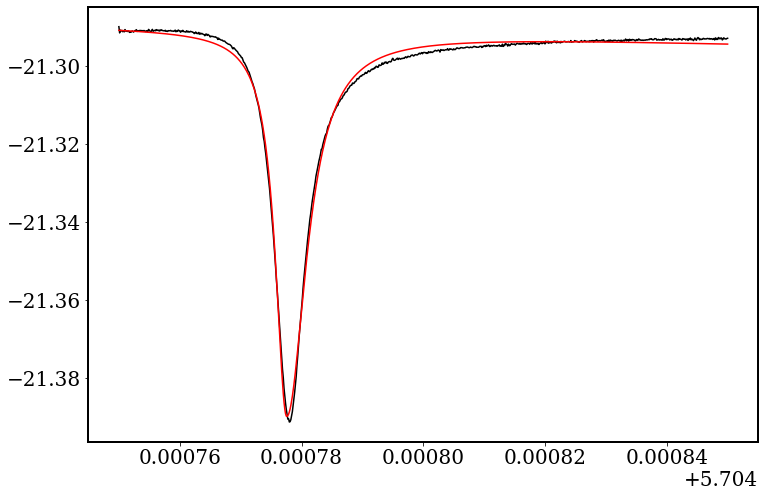

Q_factor =  9.23e+05 +/- 0.002736785549728278 	 |	 center = 5.704777569312021
RMSE =  0.0012892518442994161
#===================================
Opening  Zoomed_peak81_23:03:03:23:29:05.dat ...


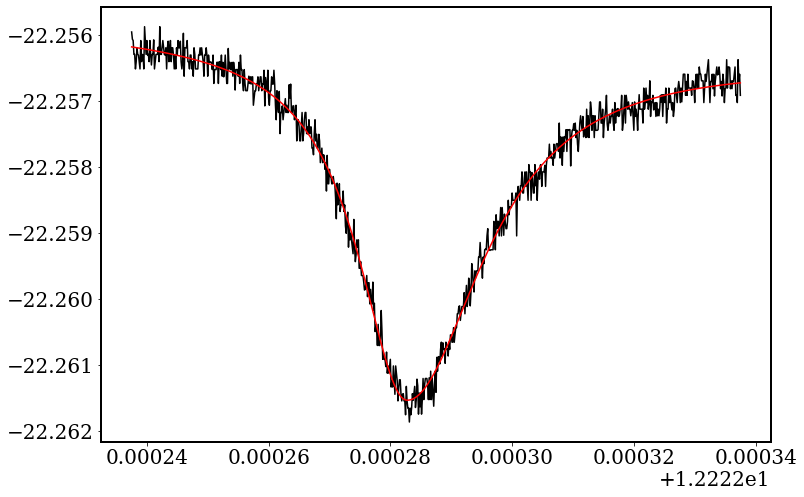

Q_factor =  4.84e+05 +/- 0.0038626395108562403 	 |	 center = 12.222282685517566
RMSE =  0.0001670604036496901
#===================================
Opening  Zoomed_peak88_23:03:03:23:53:56.dat ...


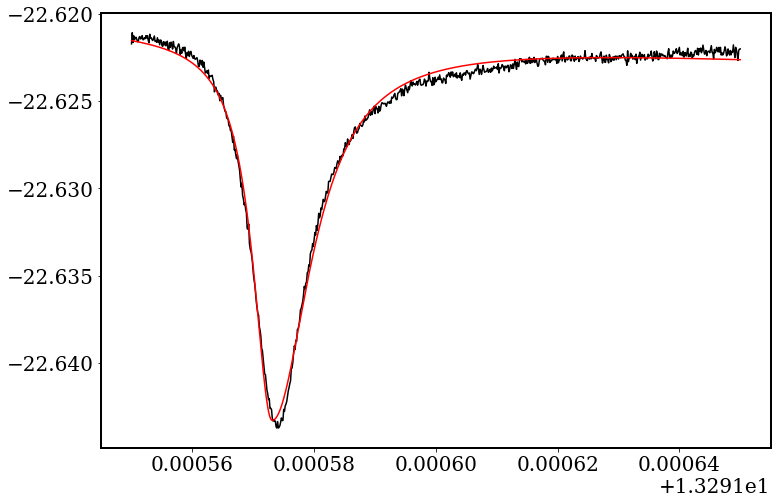

Q_factor =  1.16e+06 +/- 0.0026661636133479597 	 |	 center = 13.291573098234808
RMSE =  0.00037906319087928244
#===================================
Opening  Zoomed_peak67_23:03:03:22:32:33.dat ...


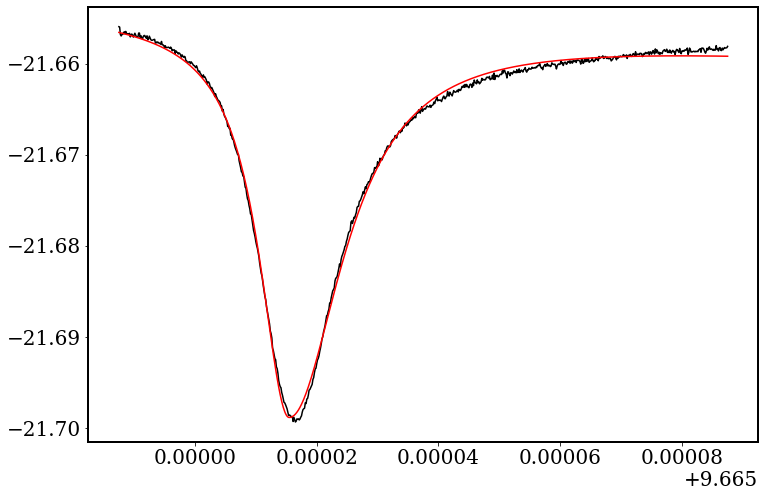

Q_factor =  5.81e+05 +/- 0.001682491455023261 	 |	 center = 9.66501545615626
RMSE =  0.0005208161892886988
#===================================
Opening  Zoomed_peak29_23:03:03:21:40:47.dat ...


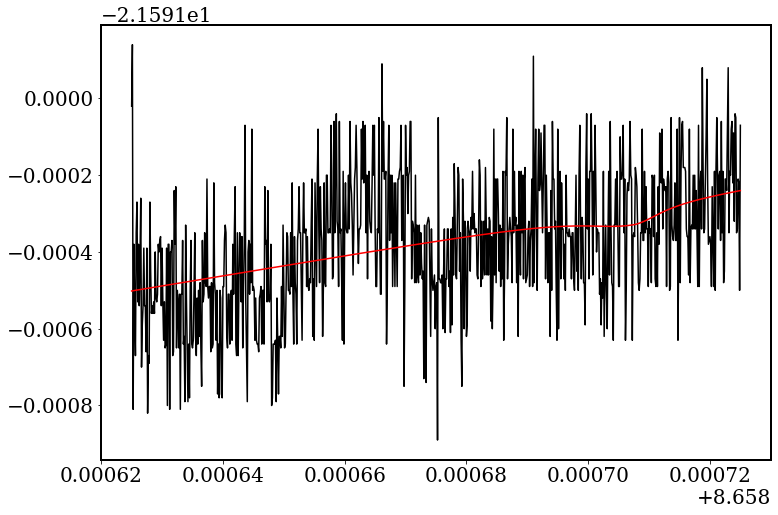

Q_factor =  5.59e+05 +/- 0.4923050630489996 	 |	 center = 8.658707437982121
RMSE =  0.0001592943734721183
#===================================
Opening  Zoomed_peak3_23:03:03:19:42:26.dat ...


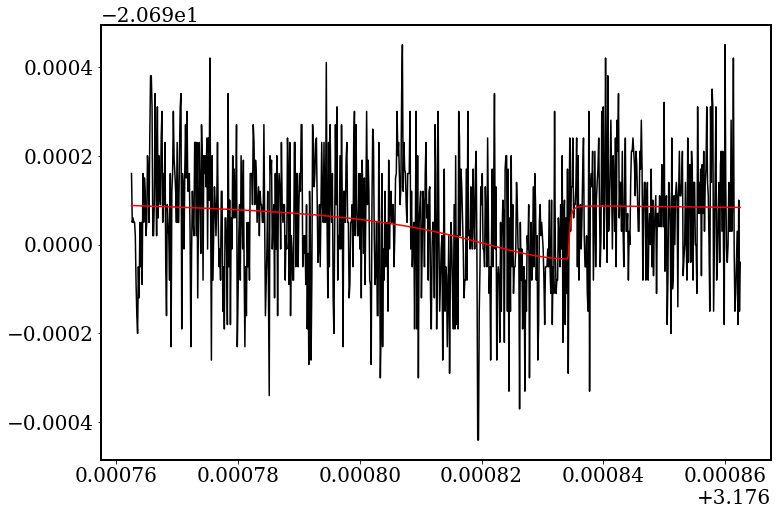

Q_factor =  1.39e+05 +/- 0.01511634040703337 	 |	 center = 3.1768341779269074
RMSE =  0.0001386504138414517
#===================================
Opening  Zoomed_peak25_23:03:03:21:34:31.dat ...


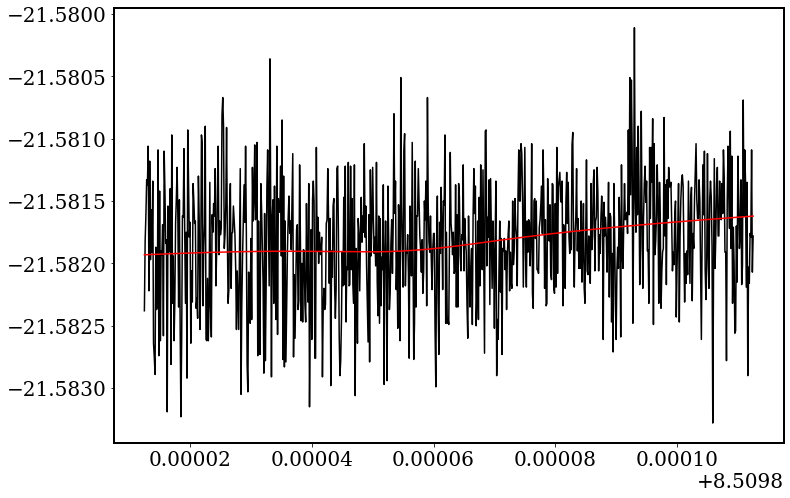

Q_factor =  1.92e+05 +/- 0.46556308376520045 	 |	 center = 8.509855960496662
RMSE =  0.0004857153630730053
#===================================
Opening  Zoomed_peak87_23:03:03:23:52:40.dat ...


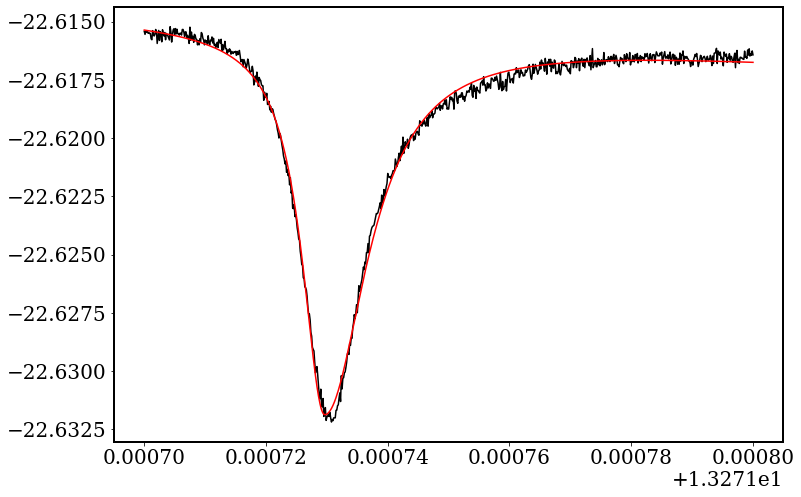

Q_factor =  1.02e+06 +/- 0.0026069657050736047 	 |	 center = 13.271729627936022
RMSE =  0.00028582066319352326
#===================================
Opening  Zoomed_peak49_23:03:03:22:04:01.dat ...


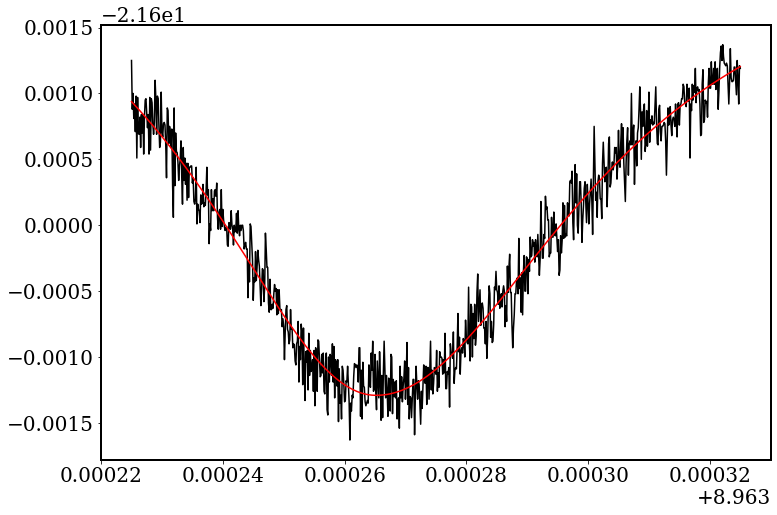

Q_factor =  1.16e+05 +/- 0.0042494984619025535 	 |	 center = 8.963264849065357
RMSE =  0.00015898109017464676
#===================================
Opening  Zoomed_peak58_23:03:03:22:22:14.dat ...


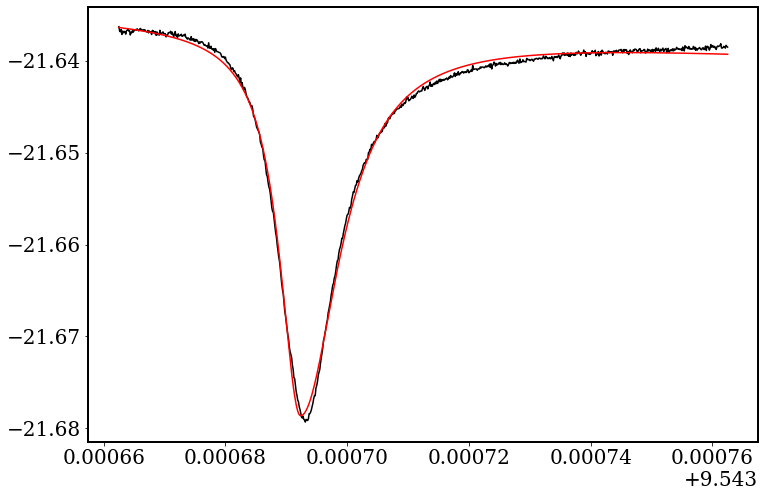

Q_factor =  8.04e+05 +/- 0.002076119060136507 	 |	 center = 9.543692332691938
RMSE =  0.0005586147225338054
#===================================
Opening  Zoomed_peak65_23:03:03:22:30:36.dat ...


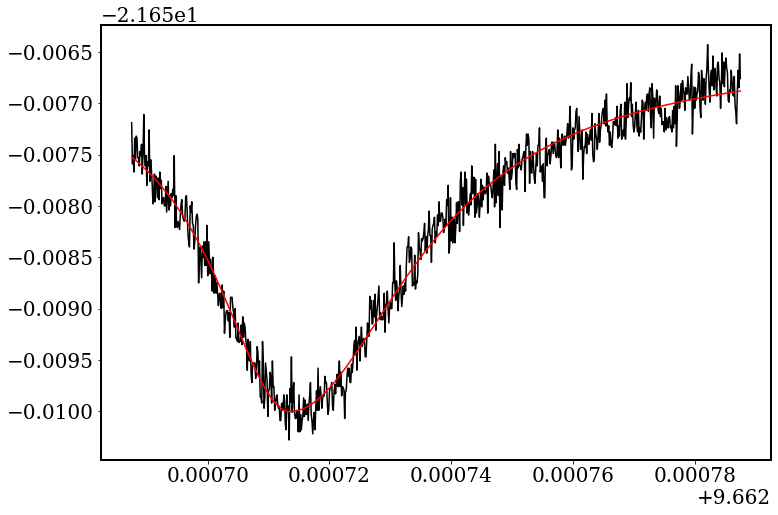

Q_factor =  2.45e+05 +/- 0.005635100398035083 	 |	 center = 9.662713556254106
RMSE =  0.00016502534586778272
#===================================
Opening  Zoomed_peak74_23:03:03:22:40:22.dat ...


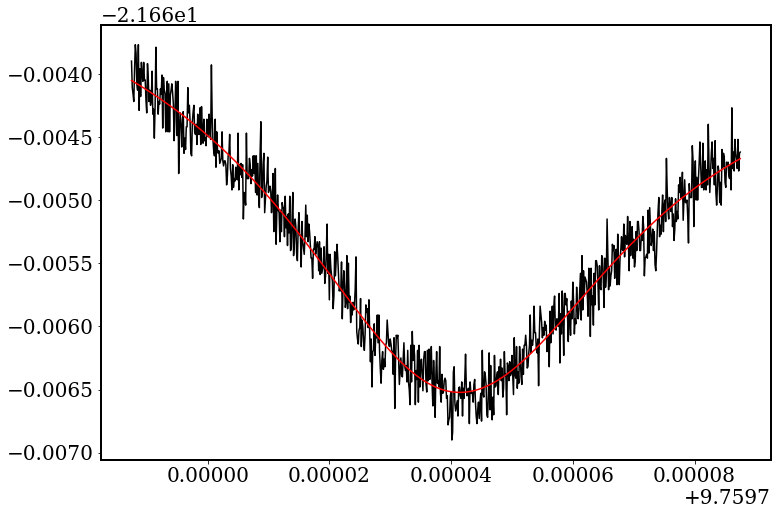

Q_factor =  1.41e+05 +/- 0.005361738110317726 	 |	 center = 9.759740648887934
RMSE =  0.00015736115436997642
#===================================
Opening  Zoomed_peak2_23:03:03:19:22:23.dat ...


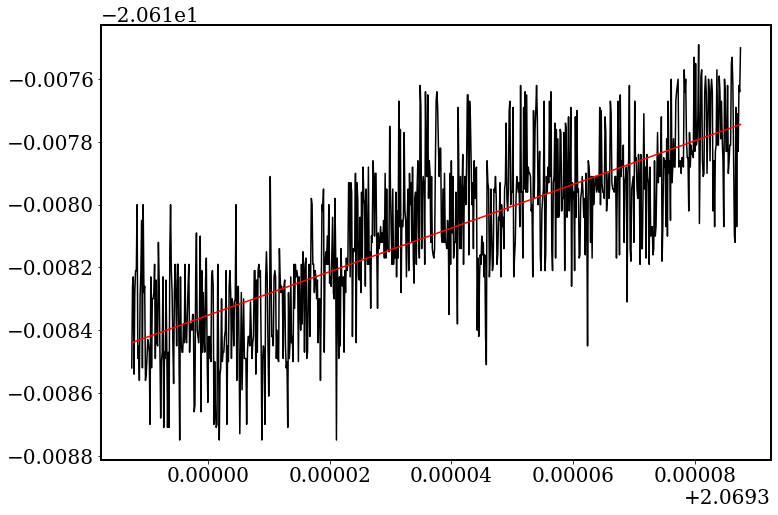

Q_factor =  1.08e+03 +/- 82002.51514577756 	 |	 center = 2.0692875
RMSE =  0.00017395050370403633
#===================================
Opening  Zoomed_peak76_23:03:03:22:43:41.dat ...


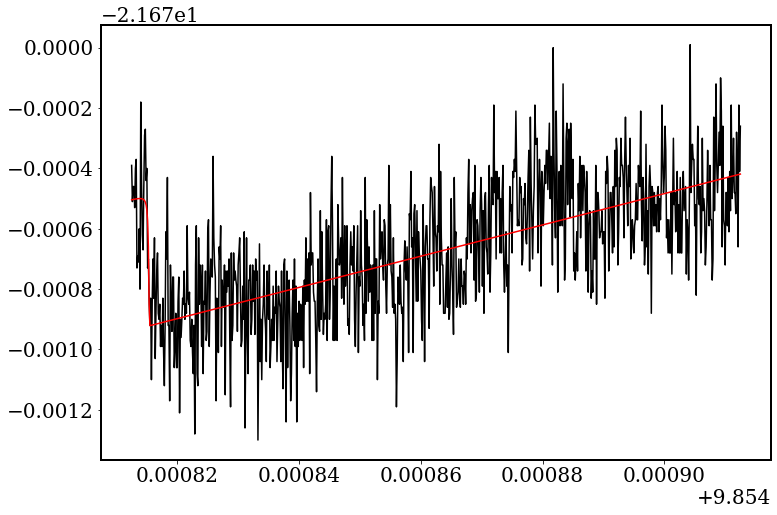

Q_factor =  5.54e+03 +/- 0.001402395194710639 	 |	 center = 9.854815443880186
RMSE =  0.0001638171314385318
#===================================


In [7]:
folder_path = '/home/matteo/Scrivania/Bauscia/BAW_27/Scan_03_03_2023/' #è la cartella dove stanno tutti i .dat
file_to_open = ".dat"   # apre tutti i file che contengono questa stringa da qualche parte
log_file_name = "Scan_03_03_2023_log.csv" # nome del .csv che salva contentente un po' di info utili
#=====================================================

info = []
info.append(['File_name','Depth [dBm]','f_center [MHz]', 'resonance center [MHz]', 'Q','% error Q','RMSE','Asimm'])
list_of_files = os.listdir(folder_path)
file_names = []
for k in range(len(list_of_files)):
    if list_of_files[k].find(file_to_open) != -1:
        nome_file = list_of_files[k]
        file_names.append(nome_file)

for name in file_names:
    data = np.loadtxt(folder_path+name)
    print('Opening ', name, '...')
    freq = data[:,0]*1e-6 #freq in MHz
    power= data[:,1]      #power in dBm
    #power = (10**(power/10))/1000 #W

    try:
        center_guess = freq[np.argmin(power)]
        gamma_guess = 10e-6
        m_guess = np.polyfit(freq,power,deg=1)[0]
        offset_guess = np.polyfit(freq,power,deg=1)[1]
        norm_guess = 1e-6
        asim_guess = 1

        initial_guess = np.array([norm_guess,gamma_guess,center_guess,m_guess,offset_guess,asim_guess])
        bounds = np.array([[0,0,freq[0],-10000,-np.inf,0],[1e-4,1e-3,freq[-1],10000,np.inf,100]])

        popt,pcov = curve_fit(fit_func,xdata=freq,ydata=power,p0=initial_guess,bounds=bounds)
        perr = (np.diag(pcov))**0.5

        norm = popt[0]
        gamma = popt[1]  #MHz
        center = popt[2] #MHz
        #depth = 1./(np.pi*gamma)*norm
        depth = np.max(popt[0]*cauchy_asim(freq,popt[1],popt[2],popt[-1]))
        Q_factor = center/(gamma*2)
        err = ((perr[2]/(popt[1]*2))**2+(popt[2]*perr[1]/(2*popt[2]**2))**2)**0.5

        rmse =RMSE(power,fit_func(freq,*popt))
        info.append([name,depth,freq[len(freq)//2],center,Q_factor,100*err/Q_factor,rmse,popt[-1]])
        plt.plot(freq,power,c='k')
        plt.plot(freq,fit_func(freq,*popt),color='r',label='Fit')
        plt.show()
        print('Q_factor = ', "{:.2e}".format(Q_factor), '+/-', err, '\t','|\t center =', center)
        print('RMSE = ', rmse)
        print('#===================================')
    except:
        plt.plot(freq,power)
        plt.show()
        info.append([name,'-','-','-','-','-','-','-'])
        print("There was a problem during the fit!")
        print('#===================================')


# sort for resonance frequencies
a = np.array(info)[:,2]
a[a=='-'] = '0'
index_sorted = np.argsort(a[1:].astype(float))[::-1]
info_array = np.array(info)
info_array[1:,:] = info_array[1:,:][index_sorted,:]
info = list(info_array)
 
        
        
with open(log_file_name, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(info)
f.close()

# Fit di un singolo .txt

In [ ]:
file_to_open = '/home/matteo/Scrivania/Bauscia//BAW_27/Scan_03_03_2023/Zoomed_peak14_23:02:27:19:57:18.dat'

data = np.loadtxt(file_to_open)
freq = data[:,0]*1e-6 #freq in MHz
#freq = data[:,0]#freq in MHz

power= data[:,1]      #power in dBm

#power = (10**(power/10))/1000 #W
#power=power*1e6 #uW
#=====================================================

center_guess = freq[np.argmin(power)]
gamma_guess = 20e-6
m_guess = np.polyfit(freq,power,deg=1)[0]
offset_guess = np.polyfit(freq,power,deg=1)[1]
norm_guess = 1e-6
asim_guess = 1

initial_guess = np.array([norm_guess,gamma_guess,center_guess,m_guess,offset_guess,asim_guess])
bounds = np.array([[0,0,freq[0],-10000,-np.inf,0],[1e-4,1e-3,freq[-1],10000,np.inf,100]])

popt,pcov = curve_fit(fit_func,xdata=freq,ydata=power,p0=initial_guess,bounds=bounds)

perr = (np.diag(pcov))**0.5

for i in range(len(popt)):
    print('Parametro ', i+1, ': ', popt[i], ' +/- ', perr[i])
Q_factor = popt[2]/(popt[1]*2)
err = ((perr[2]/(popt[1]*2))**2+(popt[2]*perr[1]/(2*popt[2]**2))**2)**0.5
print('Q = ' + "{:.2e}".format(Q_factor),' +/- ', err)
print('RMSE = ', RMSE(power,fit_func(freq,*popt)))

plt.plot(freq,power,'.',c='k',label='data')
plt.plot(freq,fit_func(freq,*popt),color='r',label='Fit')
plt.grid(alpha=0.6)
plt.legend()
plt.savefig('Resonance_example.png')
plt.ylabel('Signal power [dBm]')
plt.xlabel('Frequency [MHz]')
plt.show()